<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# ***Multi-Dimensional Scaling***

## ***Usos del escalado multidimensional***


Algunos de los usos del escalado multidimensional son:

* Reconocimiento de familias de piezas para diseñar sistemas de fabricación celular.

* Creación de grupos de productos al diseñar áreas de ensamblaje.

* Investigación de mercado, el escalado multidimensional se utiliza con frecuencia para representar datos como la percepción de productos de una manera visual y fácil de interpretar.

Por ejemplo, supongamos que un agente inmobiliario tiene muchas propiedades en venta. Cada propiedad tiene varias características, como el número de dormitorios, el número de baños, los pies cuadrados, etc. Como científico de datos, eres contratado por el agente inmobiliario para descubrir las similitudes y diferencias entre las propiedades, de modo que los agentes puedan utilizar esta información al proporcionar recomendaciones a los compradores.

Sin embargo, dado que el número de atributos de cada propiedad es mayor de lo que se puede visualizar, para tener una idea más clara de cuán diferentes son entre sí las propiedades, necesitarías reproducir los datos de las propiedades en una dimensión más baja.

En otras palabras, se utiliza un enfoque de reducción de dimensionalidad, como el escalado multidimensional, para transformar los datos de las propiedades en un espacio de menor dimensión. Esto permite representar las propiedades en un gráfico o mapa de manera más clara y comprensible, donde la distancia o proximidad entre las propiedades refleja sus similitudes o diferencias. Esto facilita la identificación de patrones, agrupamientos o relaciones entre las propiedades, lo que a su vez puede ayudar a los agentes inmobiliarios a proporcionar recomendaciones más informadas y precisas a los compradores.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/images/realtor.jpeg" width=60%>

$ \ $

----

## ***What it is Multi-Dimensional Scaling (MDS)?***

$ \ $

$\color{lightblue}{\text{Multi-Dimensional Scaling (MDS)}}$ is a family of algorithms that aim to represent the similarities or dissimilarities between objects in a lower-dimensional space. One version of $\color{lightblue}{\text{MDS}}$ is Principal Component Analysis ($PCA$), which is widely used for dimensionality reduction. $\color{lightblue}{\text{MDS}}$, like $PCA$, can transform high-dimensional data into a lower-dimensional space while preserving the pairwise distances or dissimilarities between the objects.

Mathematically, $\color{lightblue}{\text{MDS}}$ seeks to find a configuration of points in a lower-dimensional space that best approximates the original pairwise distances or dissimilarities. This is typically done by minimizing a stress function that quantifies the discrepancy between the pairwise distances in the original high-dimensional space and the distances in the lower-dimensional space.

$\color{lightblue}{\text{MDS}}$ can be useful for visualizing complex differences between objects. By representing the objects in a lower-dimensional space, $\color{lightblue}{\text{MDS}}$ allows us to plot them in a more visually interpretable manner. The distances or dissimilarities between the objects in the lower-dimensional space reflect their similarities or dissimilarities in the original high-dimensional space.

There are different categories of $\color{lightblue}{\text{MDS algorithms}}$, such as  $\color{lightgreen}{\text{metric MDS}}$ and $\color{lightgreen}{\text{non-metric MDS}}$. In  $\color{lightblue}{\text{metric MDS}}$, the original distances between objects are preserved as much as possible in the lower-dimensional space. $\color{lightgreen}{\text{Non-metric MDS}}$, on the other hand, only aims to preserve the ordinal relationships (rankings) of the distances, without necessarily preserving the exact values. The choice between $\color{lightgreen}{\text{metric and non-metric MDS}}$ depends on the nature of the data and the specific objectives of the analysis.

In this lab, both $\color{lightgreen}{\text{metric and non-metric MDS scaling}}$ will be reviewed using the scikit-learn library, which provides efficient implementations of these algorithms.

$ \ $

-----

## ***Steps in MDS analysis***

$ \ $

The following are the steps of MDS analysis:

*   Pre-process and generate training and testing datasets.

*   Train and fine-tune logistic regression models.

*   Interpret trained logistic regression models.

*   Evaluate trained logistic regression models.


$ \ $

-----

## ***Objectives***

$ \ $


After completing this lab you will be able to:

* Understand different types of Multi-Dimensional Scaling

* Understand concepts of Metric MDS and Non-Metric MDS, including: embedding space, minimization and Stress

* Apply Metric-MDS and Non-Metric MDS

* Apply different distance metrics to Metric MDS and Non-Metric MDS

* Apply MDS to dimensionality reduction

$ \ $

----

## ***Datasets***

$ \ $

Datasets for this lab are gathered from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01) under the MIT License.

$ \ $

-----

## ***Installing required libraries***

$ \ $


The following required modules are pre-installed in the Skills Network Labs environment.

In [1]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import euclidean, cityblock, cosine
import sklearn.metrics.pairwise
import seaborn as sns
import folium
import matplotlib.pyplot as plt
from sklearn.preprocessing import  MinMaxScaler
from matplotlib import offsetbox
from sklearn.manifold import MDS
from scipy.spatial.distance import squareform, pdist
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE

In [2]:
# Surpress numpy data type warnings
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)
warnings.filterwarnings("ignore", category = UserWarning)
warnings.filterwarnings("ignore", category = RuntimeWarning)
warnings.filterwarnings("ignore", category = FutureWarning)

In [3]:
sns.set_context('notebook')
sns.set_style('white')

$ \ $

-----

## ***Defining Helper functions***

$ \ $

$(1)$ This function plots out labeled scatter plots of latitude and longitude data.

In [4]:
def plot_points(df, color = "red", title = ""):

    """
    Función para trazar puntos en un gráfico.

    Parámetros:
    - df: DataFrame que contiene los datos de los puntos.
    - color: Color de los puntos en el gráfico (por defecto: "red").
    - title: Título del gráfico (por defecto: "").

    """

    # Creamos una figura con el tamaño especificado.
    plt.figure(figsize = (8, 6))

    # Extraemos las coordenadas x e y de los datos del DataFrame.
    X = df['lon']
    Y = df['lat']

    # Trazamos los puntos en el gráfico utilizando las coordenadas x e y y el color especificado.
    plt.scatter(X, Y, s = 100, color = color)

    # Establecemos el título del gráfico.
    plt.title(title)

    # Etiquetamos los ejes x e y.
    plt.xlabel("lat")
    plt.ylabel("log")

    # Extraemos las anotaciones de los datos del DataFrame.
    annotations = df.index

    # Añadimos las anotaciones a cada punto en el gráfico.
    for i, label in enumerate(annotations):
        plt.annotate(label, (X[i], Y[i]))

    # Ajustamos los ejes para que tengan la misma escala.
    plt.axis('equal')

    # Mostramos el gráfico.
    plt.show()

$ \ $

$(2)$ This function plots out labelled scatter plots of digits dataset in two dimensions after a Dimensionality reduction.

In [5]:
def plot_embedding(X, title, ax):

    """Función para trazar una incrustación (embedding) en un gráfico.
       Parámetros:
       - X: Matriz de características de la incrustación.
       - title: Título del gráfico.
       - ax: Ejes en los que trazar el gráfico."""

    # Escalamos los valores de X en el rango [0, 1].
    X = MinMaxScaler().fit_transform(X)

    # Creamos una variable que tiene los nombres
    nombres = digits.target_names

    # Iteramos sobre cada dígito en el conjunto de nombres de destino.
    for digit in nombres:
        # Trazamos los puntos correspondientes a cada dígito en el gráfico.
        # *X[y == digit].T -----> Extraemos las coordenadas x e y de los puntos.
        # marker = f"${digit}$" ------->  Marcador con la etiqueta del dígito.
        # s = 60 -------> Tamaño de los puntos.
        # color = plt.cm.Dark2(digit)  -------> Color del punto.
        # alpha = 0.425 -------> Transparencia del punto.
        # zorder = 2  -------> Orden de superposición de los puntos.
        ax.scatter(*X[y == digit].T, marker = f"${digit}$",  s = 60, color = plt.cm.Dark2(digit), alpha = 0.425, zorder = 2)

    # Solo algo grande para empezar
    shown_images = np.array([[1, 1]])

    # Describimos el numero de renglones de X
    n = X.shape[0]

    # Iteramos sobre cada punto en la incrustación.
    for i in range(n):
        # Trazamos cada dígito en la incrustación.
        # Mostramos una caja de anotación para un grupo de dígitos.

        # Calculamos el cuadrado de la distancia entre el punto actual y los puntos ya mostrados.
        dist = np.sum((X[i] - shown_images) ** 2, 1)

        if np.min(dist) < 4e-3:
            # No mostramos puntos que estén demasiado cerca.
            continue

        # Añadimos el punto actual a la lista de puntos mostrados.
        shown_images = np.concatenate([shown_images, [X[i]]], axis = 0)

        # Creamos una caja de anotación para mostrar la imagen del dígito.
        imagebox = offsetbox.AnnotationBbox(offsetbox.OffsetImage(digits.images[i], cmap = plt.cm.gray_r), X[i])

        # Establecemos el orden de superposición de la imagen.
        imagebox.set(zorder = 1)

        # Añadimos la caja de anotación al gráfico.
        ax.add_artist(imagebox)

    # Establecemos el título del gráfico.
    ax.set_title(title)

    # Desactivamos los ejes en el gráfico.
    ax.axis("off")

$ \ $

-----

## ***Metrica para el escalado multidimensional***

$ \ $


El Multidimensional escalado Métrico (Metric MDS) es un método que busca encontrar una representación de menor dimensión para un conjunto de objetos, de tal manera que las distancias entre los objetos en la representación de menor dimensión se aproximen lo más posible a las disimilaridades originales. Se supone que las disimilaridades utilizadas para cuantificar las relaciones entre los objetos son medidas métricas, es decir, satisfacen las propiedades de no-negatividad, simetría y la desigualdad triangular.

Matemáticamente, supongamos que tenemos $n$ objetos y se define una matriz de disimilaridades $D$ de tamaño $n \times n$, donde $D_{ij}$ representa la disimilaridad entre los objetos $i$ y $j$.

$$D = \begin{bmatrix}
D_{11} & D_{12} & \cdots & D_{1,n} \\ \\
D_{21} & D_{22} & \cdots & D_{2n} \\ \\
\vdots & \vdots & & \vdots \\\\\\
D_{n1} & D_{n2} & \cdots & D_{nn}
\end{bmatrix}$$


El objetivo de Metric MDS es encontrar una configuración de puntos en un espacio de menor dimensión, representada por una matriz $X$ de tamaño $n \times k$ (donde $k$ es la dimensionalidad deseada), de tal manera que las distancias entre los puntos en el espacio de menor dimensión se aproximen a las disimilaridades originales. Esto se logra al minimizar una función de estrés que cuantifica la discrepancia entre las distancias y las disimilaridades.

Una forma común de definir la función de estrés en el Metric MDS es a través del estrés al cuadrado:

$$ \text{Stress} = \sum_{i=1}^{n} \sum_{j=1}^{n} w_{ij} \left( D_{ij} - ||x_i - x_j|| \right)^2 $$

donde $w_{ij}$ es un factor de ponderación que se utiliza para asignar diferentes pesos a diferentes pares de objetos, $D_{ij}$ es la disimilaridad entre los objetos $i$ y $j$, y $||x_i - x_j||$ es la distancia euclidiana entre los puntos $x_i$ y $x_j$ en el espacio de menor dimensión.

El problema de optimización en el Metric MDS implica encontrar una configuración óptima de puntos $X$ que minimice la función de estrés. Esto se puede lograr utilizando métodos de optimización, como el descenso de gradiente o técnicas de optimización convexa.

Una vez que se obtiene la configuración óptima de puntos en el espacio de menor dimensión, podemos interpretar visualmente los resultados. Los puntos representan los objetos en un espacio de menor dimensionalidad donde las distancias entre los puntos se aproximan a las disimilaridades originales. Esto nos permite visualizar la estructura de similitudes y diferencias entre los objetos en un espacio más fácilmente interpretable.

En resumen, el Metric MDS busca encontrar una representación de menor dimensión que preserva las disimilaridades originales entre los objetos. Se logra minimizando la función de estrés que cuantifica la discrepancia entre las distancias y las disimilaridades. Una vez que se obtiene la configuración óptima, podemos interpretar visualmente los resultados para comprender mejor la estructura de los datos.

$ \ $

----

## ***From Relative Location to Absolute Location***

$ \ $


To gain a deeper understanding of how Multidimensional Scaling ($\color{yellow}{\text{MDS}}$) works, let's consider the problem of determining the positions of several cities based on their relative latitude and longitude values.

* $\color{lightgreen}{\text{Latitude}}$ is an angular measurement denoted by $\color{lightblue}{\phi}$ that specifies the north-south position of a point on the Earth's surface. It ranges from $0$° at the Equator to $90$° (North or South) at the poles. Parallels, which are lines of constant latitude, run east-west as circles parallel to the Equator.

* $\color{lightgreen}{\text{Longitude}}$, denoted by the Greek letter lambda $\color{lightblue}{λ}$, indicates the east-west position of a point on the Earth's surface. It is also measured in degrees and represents the angular distance of a point east or west of the Prime Meridian. The Prime Meridian is an imaginary line that runs from the North Pole to the South Pole, and it serves as the reference point for measuring longitude. Meridians, which are lines running from pole to pole, connect points with the same longitude.

<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/images/lat-log.png" width="300" alt="loglat"  />
</center>




Now, let's suppose we have a set of cities for which we know the relative latitude and longitude values. Our goal is to determine the positions of these cities in a lower-dimensional space using $\color{yellow}{\text{MDS}}$.

To achieve this, we can construct a dissimilarity matrix based on the pairwise distances or dissimilarities between the cities. One commonly used measure is the Euclidean distance, which calculates the straight-line distance between two points in a Cartesian coordinate system. However, alternative distance metrics or dissimilarity measures can also be employed depending on the specific requirements of the problem.

Once we have the dissimilarity matrix,  $\color{yellow}{\text{MDS}}$ can be applied to find a configuration of points in a lower-dimensional space that best represents the original pairwise dissimilarities.  $\color{yellow}{\text{MDS}}$ aims to minimize a stress function that quantifies the discrepancy between the dissimilarities in the original high-dimensional space and the distances in the lower-dimensional space.

The optimization process in $\color{yellow}{\text{MDS}}$ involves finding the coordinates of the cities in the lower-dimensional space that minimize the stress function. This can be achieved through iterative algorithms such as gradient descent or matrix factorization techniques.

Once the optimization is complete and the optimal configuration is obtained, the cities' positions in the lower-dimensional space can be visualized and interpreted. The distances or dissimilarities between the cities in this space reflect their relative positions based on latitude and longitude.

In summary,  $\color{yellow}{\text{MDS}}$ provides a method for determining the positions of cities or other objects based on their relative latitude and longitude values. By leveraging a dissimilarity matrix and optimizing a stress function, $\color{yellow}{\text{MDS}}$ finds a lower-dimensional representation that approximates the original distances. This enables us to visualize and interpret the relative positions of the cities in a more manageable and interpretable space.

$ \ $

$(1)$ We will use angles between the cities. Here is the length of the relative latitude and longitude of several cities $d_{ij}$.


In [6]:
# Se especifica la URL del archivo CSV que contiene la tabla de distancias entre puntos.
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/distance.csv'

# Se lee el archivo CSV y se establece la columna 'name' como índice del DataFrame resultante.
distance = pd.read_csv(url).set_index('name')

# Se muestra una vista previa de las primeras filas del DataFrame 'distance'.
distance.head()

,Buenos Aires,Paris,Melbourne,St Petersbourg,Abidjan,Montreal,Nairobi,Salvador
name,,,,,,,,
Buenos Aires,0.00,83.00,4.00,93.93,39.33,79.52,32.71,21.03
Paris,83.00,0.00,87.00,10.93,43.67,3.48,50.29,61.97
Melbourne,4.00,87.00,0.00,97.93,43.33,83.52,36.71,25.03
St Petersbourg,93.93,10.93,97.93,0.00,54.60,14.41,61.22,72.90
Abidjan,39.33,43.67,43.33,54.60,0.00,40.19,6.62,18.30


$ \ $

$(2)$ For Multidimensional Scaling in `sklearn`, we import the `MDS` constructor from the `manifold` module and  we create an MDS object `embedding` with the following parameters:

* `n_components`: Number of dimensions in which to immerse the dissimilarities, default $=2$

* `precomputed`: Pre-computed dissimilarities are passed directly to **fit** and **fit_transform**

* `max_iter` : Maximum number of iterations of the <a href='https://scikit-learn.org/stable/modules/generated/sklearn.manifold.smacof.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01'> SMACOF</a> algorithm for a single run, default $= 300$

* `eps`: Relative tolerance with respect to stress at which to declare convergence, default $=1e-3$



In [7]:
# Se crea una instancia del algoritmo MDS (Multidimensional Scaling).
# La variable 'embedding' representa esta instancia del algoritmo.
# disimilarity='precomputed': Esto indica que el algoritmo MDS espera una matriz de disimilaridades precalculada en lugar de una matriz de características. La matriz de disimilaridades debe tener las distancias (similitudes o disimilitudes) entre los puntos que se desean representar en el espacio reducido.
# n_components=2: Especifica que el algoritmo debe reducir la dimensionalidad a 2 componentes principales. Esto significa que las coordenadas de los puntos en el espacio reducido tendrán dos dimensiones.
# random_state=0: Es un valor numérico que se utiliza para inicializar el generador de números aleatorios. Esto asegura que el resultado de la reducción de dimensionalidad sea reproducible, ya que se utiliza la misma semilla aleatoria en cada ejecución.
# max_iter=300: Es el número máximo de iteraciones permitidas para el algoritmo MDS. Si el algoritmo no ha convergido después de este número de iteraciones, se detendrá y proporcionará el resultado actual.
# eps=1e-3: Es la tolerancia para la convergencia del algoritmo MDS. Si el cambio en el error de ajuste entre dos iteraciones consecutivas es menor que este valor, el algoritmo se considera convergido y se detiene.
embedding =  MDS(dissimilarity = 'precomputed', n_components = 2, random_state = 0, max_iter = 300, eps = 1e-3)

In [8]:
embedding

MDS(dissimilarity='precomputed', random_state=0)

$ \ $

$(3)$ We apply `fit_transform` to the data from  `distance` array that fits the model and returns the embedded coordinates. The stress is minimized via  <a href='https://scikit-learn.org/stable/modules/generated/sklearn.manifold.smacof.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01'> SMACOF</a>.

In [9]:
X_transformed = embedding.fit_transform(distance)

In [10]:
X_transformed

array([[-11.18630004, -41.80256455],
       [  9.5136384 ,  38.73201664],
       [ -9.2923592 , -46.08804169],
       [ 16.54916736,  47.74663293],
       [ -1.60844493,  -3.57521947],
       [  7.3287376 ,  35.79475057],
       [ -3.00161566, -10.07223994],
       [ -8.30282353, -20.7353345 ]])

$ \ $

$(4)$ We plot the coordinates as an 'X_transformed'  approximation of the longitude and latitude.


In [11]:
# Se crea un nuevo DataFrame 'df_t' a partir de la matriz de datos transformados 'X_transformed'.
# La matriz de datos transformados contiene las coordenadas en el espacio reducido después de aplicar la transformación.
# Las columnas del DataFrame 'df_t' se etiquetan como "lon" y "lat" para representar las coordenadas longitudinales y latitudinales respectivamente.
# Los nombres de las ciudades (o puntos) se utilizan como índices para las filas del DataFrame 'df_t'.
df_t = pd.DataFrame(X_transformed, columns = ["lon", "lat"], index = distance.columns)

# Se muestra una vista previa de las primeras filas del DataFrame 'df_t'.
df_t

,lon,lat
Buenos Aires,-11.186300,-41.802565
Paris,9.513638,38.732017
Melbourne,-9.292359,-46.088042
St Petersbourg,16.549167,47.746633
Abidjan,-1.608445,-3.575219
Montreal,7.328738,35.794751
Nairobi,-3.001616,-10.072240
Salvador,-8.302824,-20.735334


$ \ $

$(5)$ We can also obtain the embeddings using the attribute `embedding_`.


In [12]:
# Esta linea proporciona la representación en 2D de los puntos en el espacio reducido después de aplicar el algoritmo MDS.
embedding.embedding_

array([[-11.18630004, -41.80256455],
       [  9.5136384 ,  38.73201664],
       [ -9.2923592 , -46.08804169],
       [ 16.54916736,  47.74663293],
       [ -1.60844493,  -3.57521947],
       [  7.3287376 ,  35.79475057],
       [ -3.00161566, -10.07223994],
       [ -8.30282353, -20.7353345 ]])

$ \ $

$(6)$ We can obtain the stress (sum of squared distance of the disparities and the distances for all constrained points).

In [13]:
# Esta linea proporciona una medida cuantitativa de qué tan bien el algoritmo MDS representa los datos originales en el espacio de baja dimensionalidad. Un stress cercano a cero indica un ajuste muy preciso y fiel a los datos originales.
embedding.stress_

2.417240800968404

$ \ $

$(7)$ We will use the pairwise `dissimilarity_matrix_` function.


In [14]:
# Esta linea proporciona la matriz de disimilitud utilizada por el algoritmo MDS para realizar la reducción de dimensionalidad. Esta matriz es fundamental para el proceso de encontrar una representación en un espacio de menor dimensión que conserve las relaciones de distancia entre los puntos en el espacio de alta dimensionalidad.
embedding.dissimilarity_matrix_

array([[ 0.  , 83.  ,  4.  , 93.93, 39.33, 79.52, 32.71, 21.03],
       [83.  ,  0.  , 87.  , 10.93, 43.67,  3.48, 50.29, 61.97],
       [ 4.  , 87.  ,  0.  , 97.93, 43.33, 83.52, 36.71, 25.03],
       [93.93, 10.93, 97.93,  0.  , 54.6 , 14.41, 61.22, 72.9 ],
       [39.33, 43.67, 43.33, 54.6 ,  0.  , 40.19,  6.62, 18.3 ],
       [79.52,  3.48, 83.52, 14.41, 40.19,  0.  , 46.81, 58.49],
       [32.71, 50.29, 36.71, 61.22,  6.62, 46.81,  0.  , 11.68],
       [21.03, 61.97, 25.03, 72.9 , 18.3 , 58.49, 11.68,  0.  ]])

$ \ $

$(8)$ We compare the embeddings to the longitude and latitude of each city.

In [15]:
diccionario = {'lon':[-58, 2, 145, 30.32, -4.03, -73.57, 36.82, -38.5],
               'lat':[-34, 49, -38, 59.93, 5.33, 45.52, -1.29, -12.97],
               'name':['Buenos Aires', 'Paris', 'Melbourne', 'St Petersbourg', 'Abidjan', 'Montreal', 'Nairobi', 'Salvador']}

In [16]:
# Se crea un DataFrame a partir del diccionario 'diccionario'.
df = pd.DataFrame(diccionario)

# Se establece la columna 'name' como índice del DataFrame 'df'.
df = df.set_index('name')

# Se muestra el DataFrame 'df' que ahora tiene la columna 'name' como índice.
df

,lon,lat
name,,
Buenos Aires,-58.00,-34.00
Paris,2.00,49.00
Melbourne,145.00,-38.00
St Petersbourg,30.32,59.93
Abidjan,-4.03,5.33
Montreal,-73.57,45.52
Nairobi,36.82,-1.29
Salvador,-38.50,-12.97


$ \ $

$(9)$ We compare the embeddings to the original data.

<Figure size 1000x800 with 0 Axes>

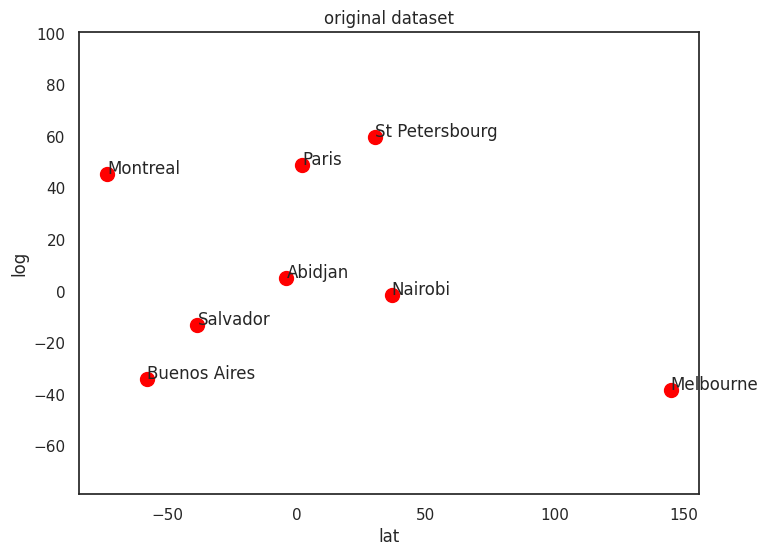

<Figure size 1000x800 with 0 Axes>

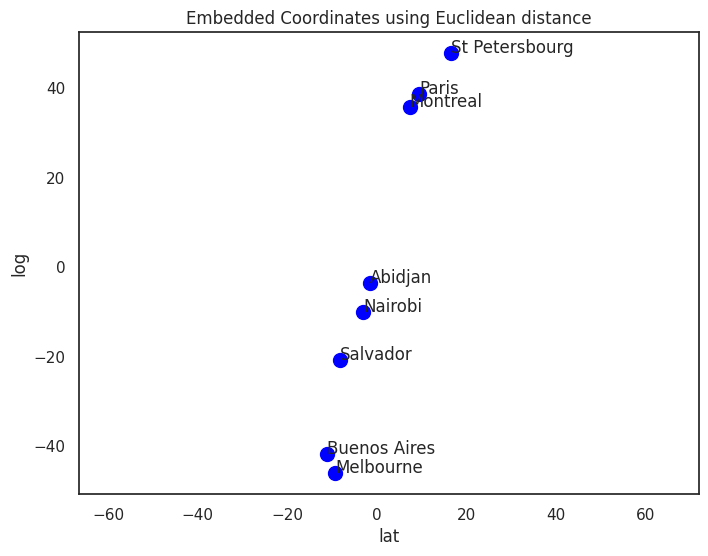

In [17]:
# Ajustar el tamaño de la figura para el primer gráfico
plt.figure(figsize = (10, 8))

# Se utiliza la función plot_points para crear un gráfico de dispersión de los puntos del DataFrame 'df'.
# Se utiliza la columna 'lon' como coordenada x y la columna 'lat' como coordenada y.
# Los puntos se colorearán en rojo y se mostrará el título "original dataset".
plot_points(df, title = 'original dataset')


# ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


# Ajustar el tamaño de la figura para el segundo gráfico
plt.figure(figsize = (10, 8))

# Se utiliza la función plot_points para crear otro gráfico de dispersión de los puntos del DataFrame 'df_t'.
# Se utiliza la columna 'lon' como coordenada x y la columna 'lat' como coordenada y.
# Los puntos se colorearán en azul y se mostrará el título "Embedded Coordinates using Euclidean distance".
plot_points(df_t, color = 'blue', title = 'Embedded Coordinates using Euclidean distance')


# ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


# Muestra los gráficos construidos
plt.show()

We see the longitude relationship persevered, but the latitude seems to be distorted. This is because $\color{yellow}{\text{MDS}}$ preserves the stress relationship between data points. We can verify this by examining the clusters in the embedded coordinates.

By examining the embedded coordinates, we see three groups or clusters. If we examine the distance dataframe, we see these groups are near each other. For example, Melbourne and Buenos Aires have a distance of four, this corresponds to the cluster of the cities at the bottom. Similarly, if you examine the relationship between Paris, St Petersbourg and Montreal, you see they are near each other. The same relation holds for the rest of the other cities.

$ \ $

------

## ***Example***

$ \ $

$(1)$ We can recreate the distance dataframe using `pdist`. This calculates the Pairwise distances between data points in df. We then apply `squareform` that converts the result to a square-form distance matrix.


In [18]:
# Selecciona todas las filas del DataFrame 'df' y todas las columnas excepto la primera columna.
dataframe = df.iloc[:, 1:]

# La expresión squareform(pdist(dataframe)) calcula las distancias entre los puntos de un DataFrame utilizando la función pdist de la biblioteca scipy.spatial.distance y luego convierte el resultado en una matriz cuadrada utilizando la función squareform también de scipy.spatial.distance.
data = squareform(pdist(dataframe))

# Creamos un DataFrame llamado 'distance' con las distancias calculadas
distance = pd.DataFrame(data, columns = df.index, index = df.index)

In [19]:
distance

name,Buenos Aires,Paris,Melbourne,St Petersbourg,Abidjan,Montreal,Nairobi,Salvador
name,,,,,,,,
Buenos Aires,0.00,83.00,4.00,93.93,39.33,79.52,32.71,21.03
Paris,83.00,0.00,87.00,10.93,43.67,3.48,50.29,61.97
Melbourne,4.00,87.00,0.00,97.93,43.33,83.52,36.71,25.03
St Petersbourg,93.93,10.93,97.93,0.00,54.60,14.41,61.22,72.90
Abidjan,39.33,43.67,43.33,54.60,0.00,40.19,6.62,18.30
Montreal,79.52,3.48,83.52,14.41,40.19,0.00,46.81,58.49
Nairobi,32.71,50.29,36.71,61.22,6.62,46.81,0.00,11.68
Salvador,21.03,61.97,25.03,72.90,18.30,58.49,11.68,0.00


We see $\color{yellow}{\text{MDS}}$ clusters on the distance matrix; unlike the principal component analysis, we can apply different distances. In the following lines of code, we use other distance metrics on the longitude and latitude of different cities, then apply $\color{yellow}{\text{MDS}}$.

$ \ $

$(2)$ We plot out the results and see each distance has its own unique property.

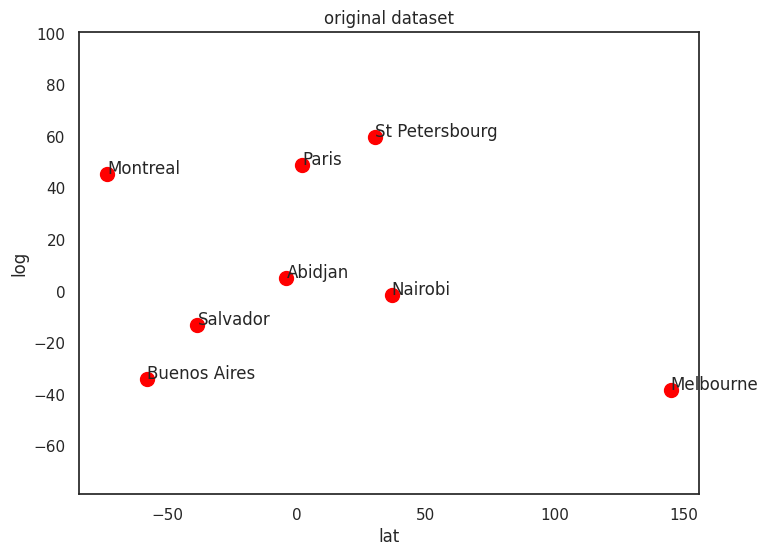

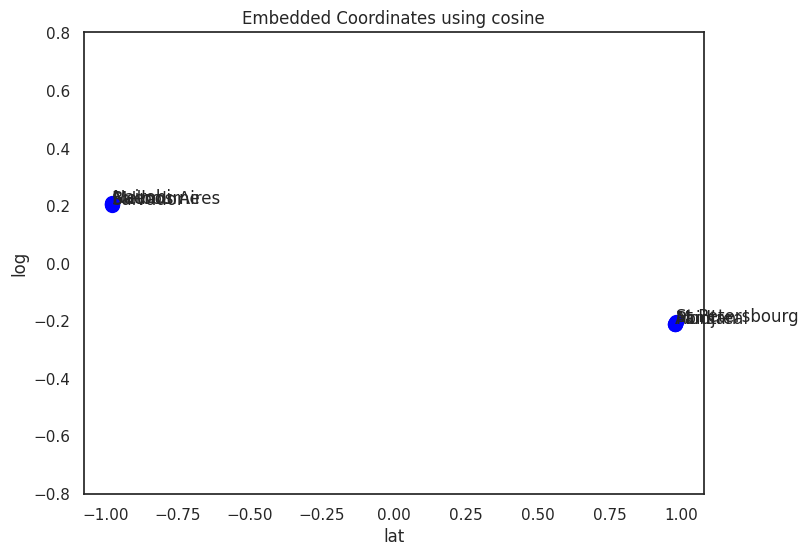

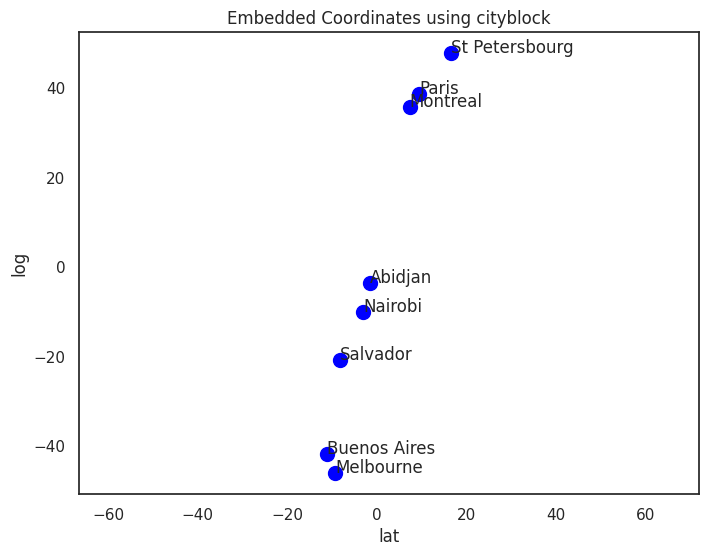

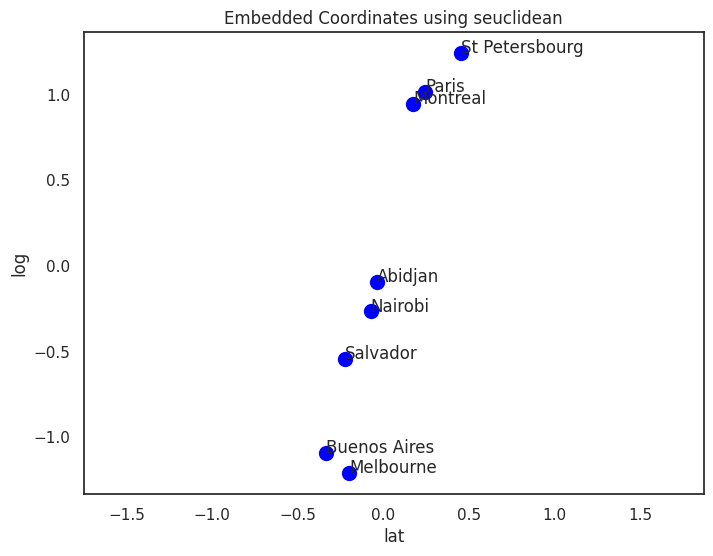

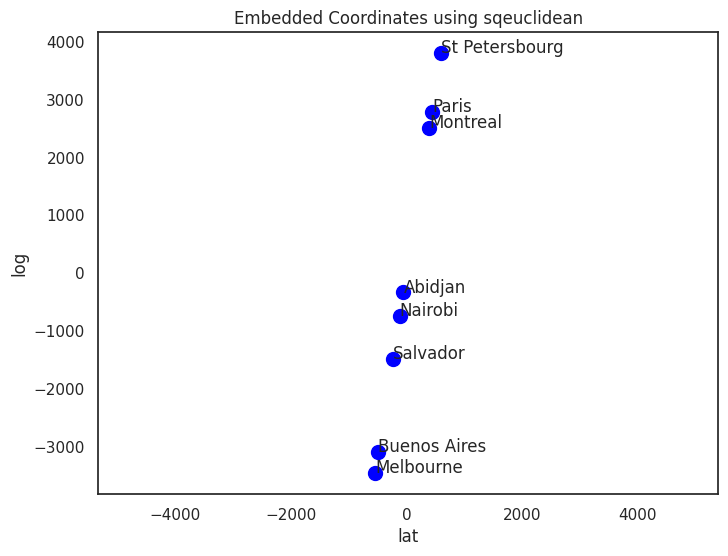

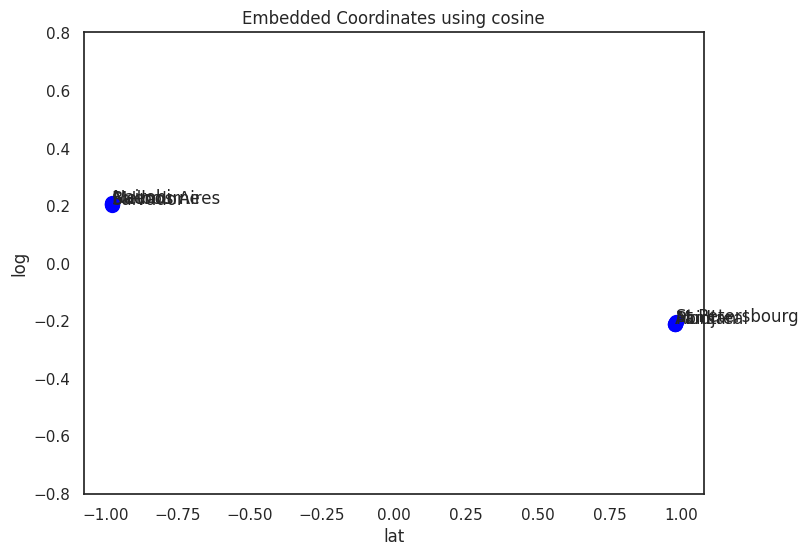

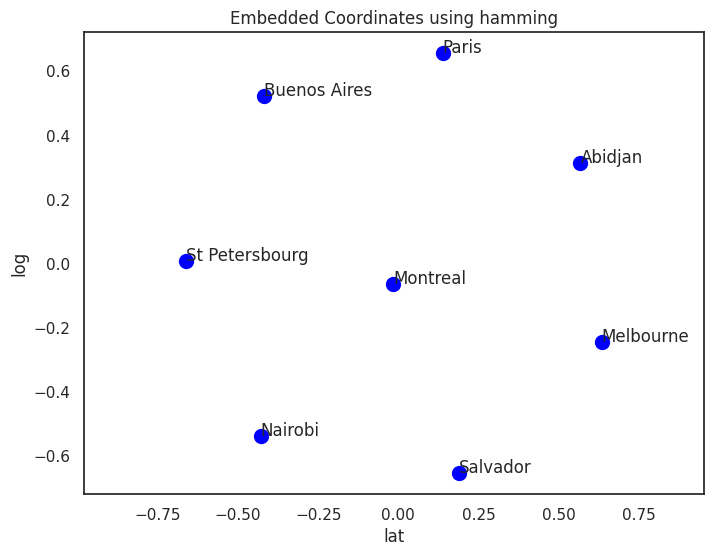

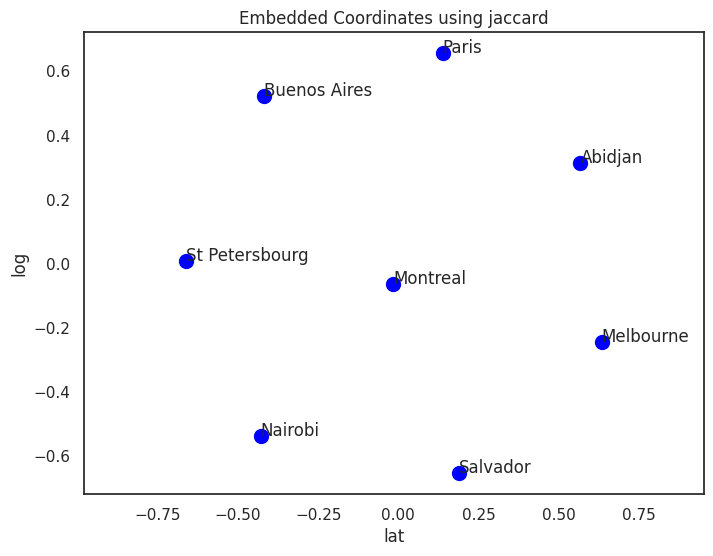

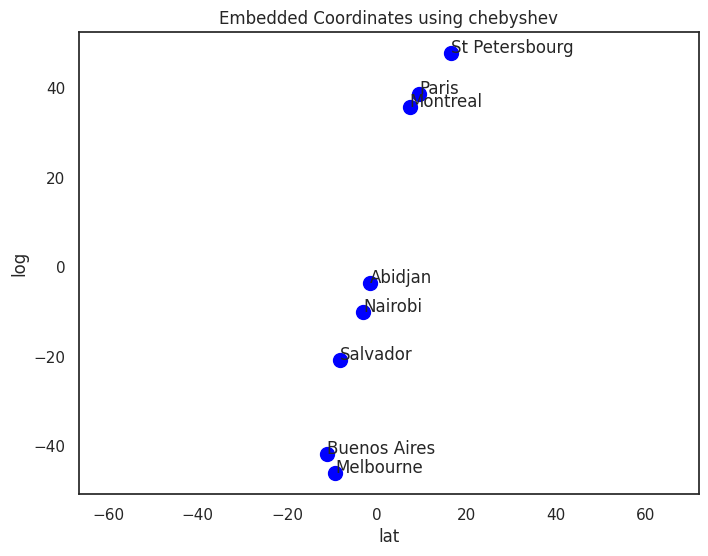

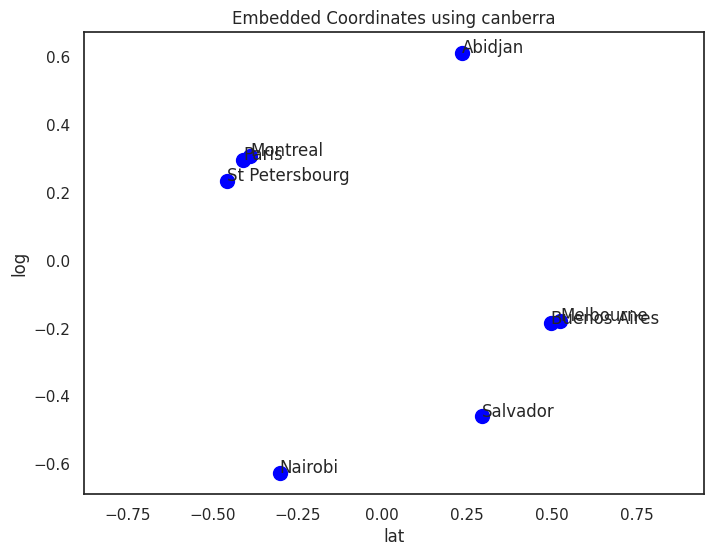

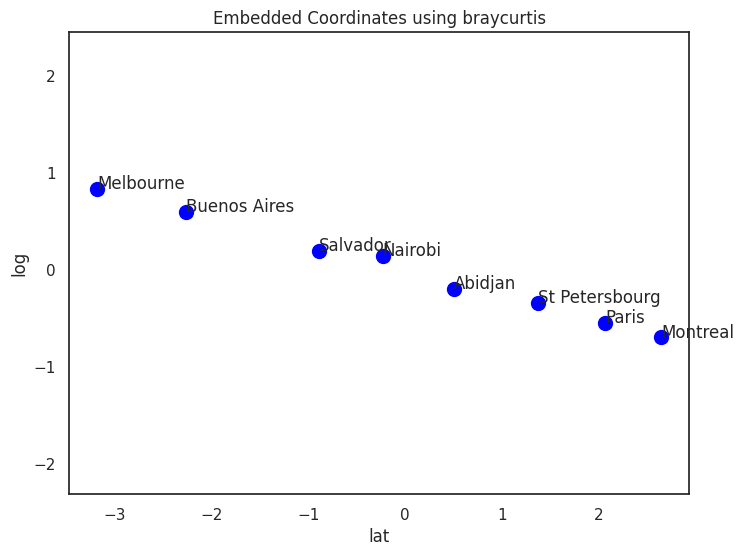

In [20]:
# Listamos las métricas de distancia a utilizar
dist = ['cosine', 'cityblock', 'seuclidean', 'sqeuclidean', 'cosine', 'hamming', 'jaccard', 'chebyshev', 'canberra', 'braycurtis']

# Graficamos el DataFrame original
plot_points(df, title = 'original dataset')

# Esta linea de codigo es para describir un espacio entre cada plot
print("\n\n\n")

# Bucle para calcular y graficar las coordenadas incrustadas con diferentes métricas de distancia
for d in dist:

    # Calculamos la matriz de distancias utilizando la métrica de distancia 'd'
    dataframe = squareform(pdist(df.iloc[:, 1:], metric = d))

    # Creamos un DataFrame llamado 'distance' para almacenar las distancias calculadas
    distance = pd.DataFrame(dataframe, columns = df.index, index = df.index)

    # Aplicamos Multidimensional Scaling (MDS) con la matriz de distancias precalculada
    embedding = MDS(dissimilarity = 'precomputed', random_state = 0, n_components = 2)

    # En esta línea de código ajusta el modelo MDS a los datos de distancia precalculados y transforma esos datos en un nuevo espacio bidimensional. Luego, los puntos resultantes se almacenan en la variable X_transformed, que puede utilizarse para visualizar los datos reducidos en un plano cartesiano (x, y).
    X_transformed = embedding.fit_transform(distance)

    # Creamos un nuevo DataFrame llamado 'df_t' con las coordenadas incrustadas
    df_t = pd.DataFrame(X_transformed, columns = df.columns, index = df.index)

    # Graficamos las coordenadas incrustadas con el título 'Embedded Coordinates using d' y puntos en azul
    plot_points(df_t, title = 'Embedded Coordinates using ' + d, color = 'blue')

    # Esta linea de codigo es para describir un espacio entre cada plot
    print("\n\n\n")


$ \ $

------

## ***Non-Metric MDS***

$ \ $


$\color{lightgreen}{\text{Non-Metric Multidimensional Scaling}}$ or $\color{lightgreen}{\text{Non-Metric MDS}}$ is a variant of $\color{yellow}{\text{MDS}}$ that deals with data when the distances between data points are only qualitatively meaningful or ordinal, rather than quantitatively measured. In traditional $\color{yellow}{\text{MDS}}$, the input is a matrix of actual distances between data points. However, in $\color{lightgreen}{\text{Non-Metric MDS}}$, we work with a rank-ordered matrix representing the similarities or dissimilarities between the data points.

The mathematical details of  $\color{lightgreen}{\text{Non-Metric MDS}}$ are as follows:

$(1)$ $\color{lightblue}{\text{Rank-Ordered Matrix.}}$

Let $D = (D_{ij}) $ be the rank-ordered matrix, where $D_{ij}$ represents the rank of the similarity or dissimilarity between points $x_i$ and $x_j$. The rank is an integer from $1$ (most similar) to $n$ (most dissimilar).

$(2)$ $\color{lightblue}{\text{Stress Function.}}$

The stress function $E$ in $\color{lightgreen}{\text{Non-Metric MDS}}$ is defined as:

$$E = \frac{\sum \limits_{i \neq j} (\delta_{ij} \cdot (d_{ij} - \delta_{ij})^2)}{\sum \limits_{i \neq j} (\delta_{ij} \cdot d_{ij}^2)}$$

- $d_{ij}$ is the Euclidean distance between the data points $x_i$ and $x_j$ in the low-dimensional space.

- $\delta_{ij}$ is the rank-ordered distance between $x_i$ and $x_j$ in the original rank-ordered matrix $D$. It is the absolute difference between their ranks $|D_{ij} - D_{ji}|$.

The stress function measures the discrepancy between the rank-ordered distances in the original data and the rank-ordered distances in the low-dimensional representation. Minimizing the stress function allows us to find a configuration of points in the low-dimensional space that preserves the rank order of similarities or dissimilarities as much as possible.

The optimization process typically involves iteratively adjusting the positions of the data points in the low-dimensional space to minimize the stress function. This is often achieved using numerical optimization techniques like gradient descent.

Once the optimization converges, the data points are represented in the low-dimensional space, and this representation can be visualized to gain insights into the underlying structure of the data. $\color{lightgreen}{\text{Non-Metric MDS}}$ is particularly useful when dealing with ordinal or qualitative data where precise distance information is not available.

$ \ $

$(1)$ We perform $\color{lightgreen}{\text{Non-Metric MDS}}$. To do this, we first set `metric` to False.


In [21]:
# Configuración para el cálculo de métricas
metric = False

# Configuración para la aplicación de MDS
embedding = MDS(dissimilarity = 'precomputed', n_components = 2, metric = metric, random_state = 0)

$ \ $

$(2)$ We apply `fit_transform()` to the data from array distance that fits the model and returns the embedded coordinates, and convert it to a dataframe.


In [22]:
# Calculamos las coordenadas incrustadas utilizando el algoritmo de Multidimensional Scaling (MDS) con la matriz precalculada de distancias distance. La función fit_transform() del objeto embedding ajusta el modelo MDS a los datos de entrada y luego transforma esos datos en coordenadas incrustadas en un espacio bidimensional.
X_transformed = embedding.fit_transform(distance)

# Creamos un DataFrame con las coordenadas incrustadas
df_t = pd.DataFrame(X_transformed, columns = df.columns, index = df.index)

# Mostramos las primeras 8 filas del DataFrame df_t
df_t

,lon,lat
name,,
Buenos Aires,-0.481280,-0.175819
Paris,0.377720,0.183754
Melbourne,-0.445045,-0.220975
St Petersbourg,0.311999,0.261570
Abidjan,0.535899,-0.180281
Montreal,0.374681,0.134138
Nairobi,-0.190865,0.245860
Salvador,-0.501274,-0.277808


$ \ $

$(3)$ $\color{lightgreen}{\text{Non-Metric MDS}}$ does better at preserving the horizontal scale, but the cities are negatively scaled in the longitudinal direction. At the same time, some cities like Paris and Montreal seem to have a different relationship in the latitudinal direction.

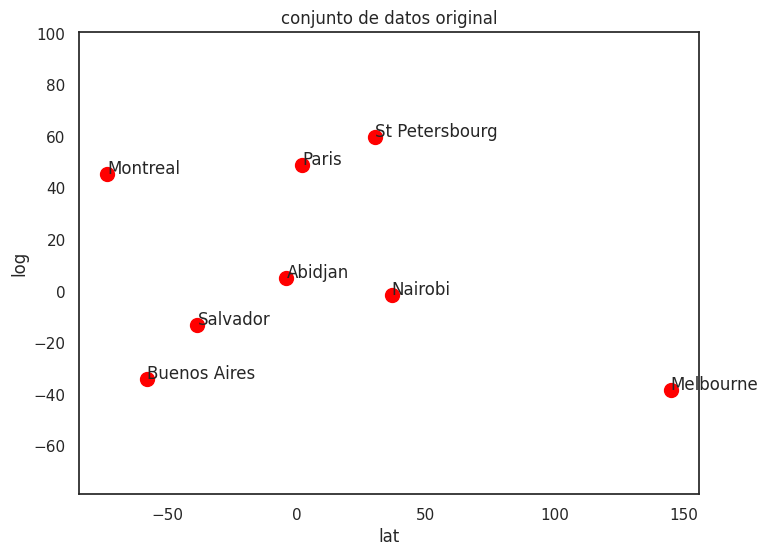

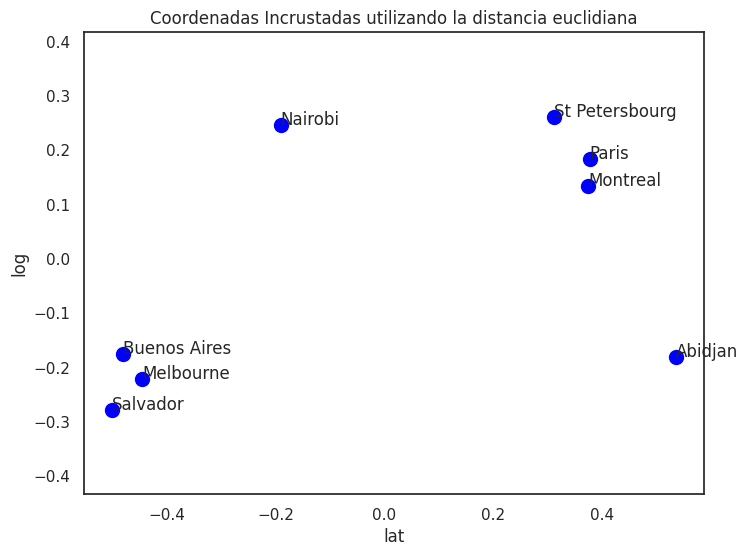

In [23]:
# Generamos el primer gráfico de dispersión (conjunto de datos original)
plot_points(df, title = 'conjunto de datos original')

# Realizamos un espacio entre los plots
print("\n\n\n")

# Generamos el segundo gráfico de dispersión (Coordenadas Incrustadas utilizando la distancia euclidiana)
plot_points(df_t, color = 'blue', title = 'Coordenadas Incrustadas utilizando la distancia euclidiana')

$ \ $

$(4)$ We apply different distances to $\color{lightgreen}{\text{Non-Metric MDS}}$.

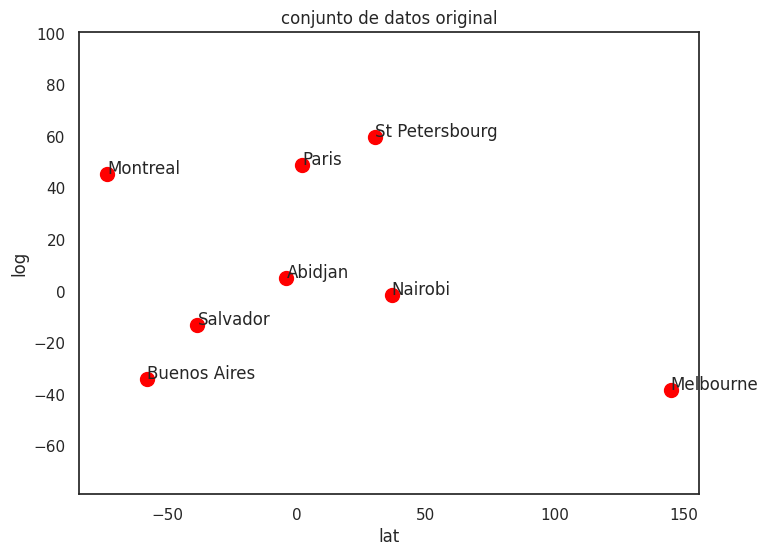

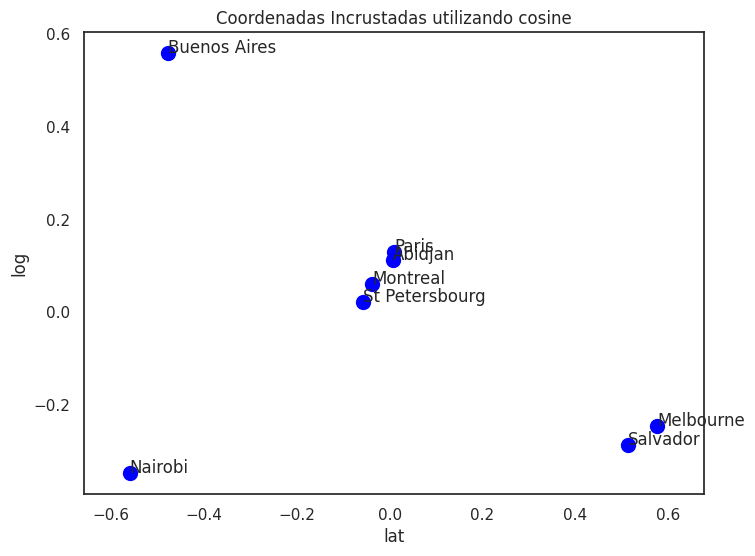

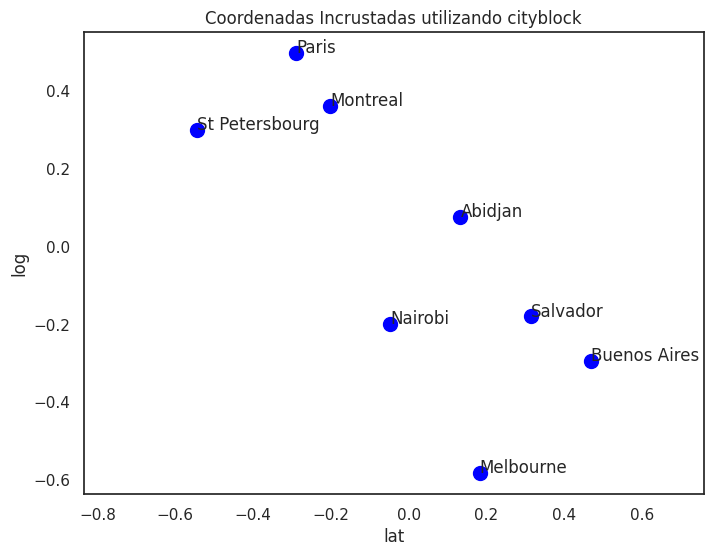

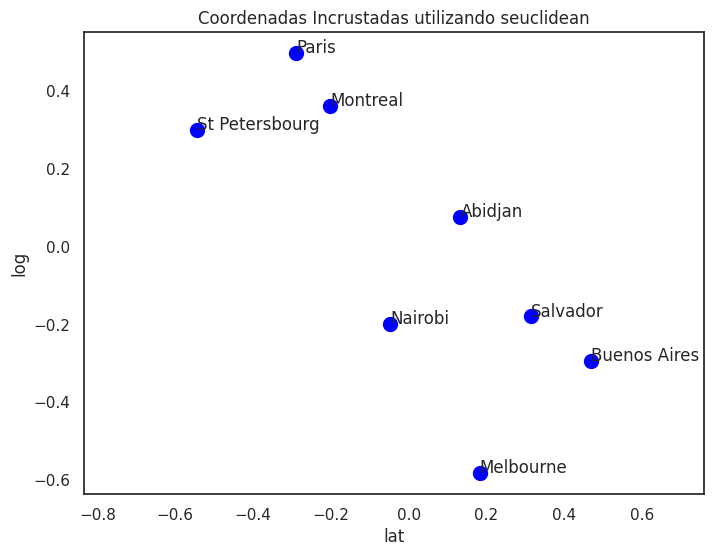

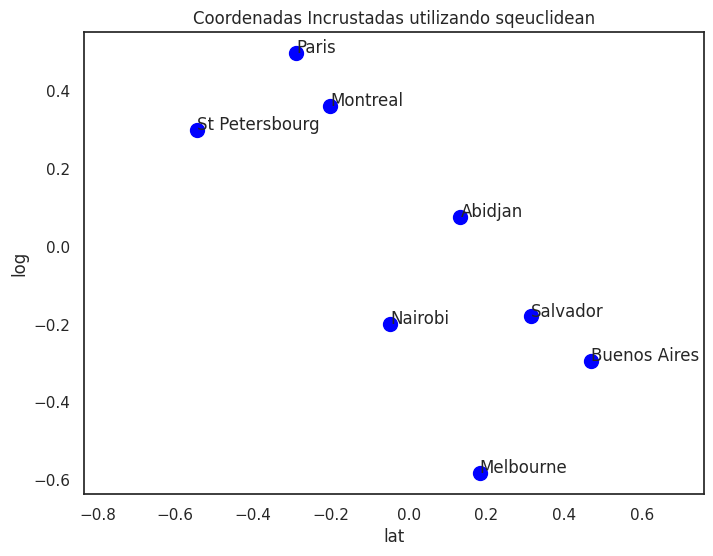

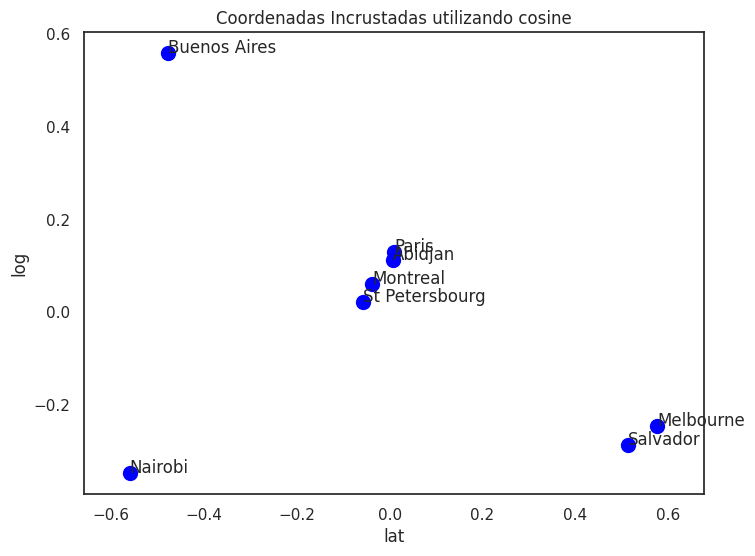

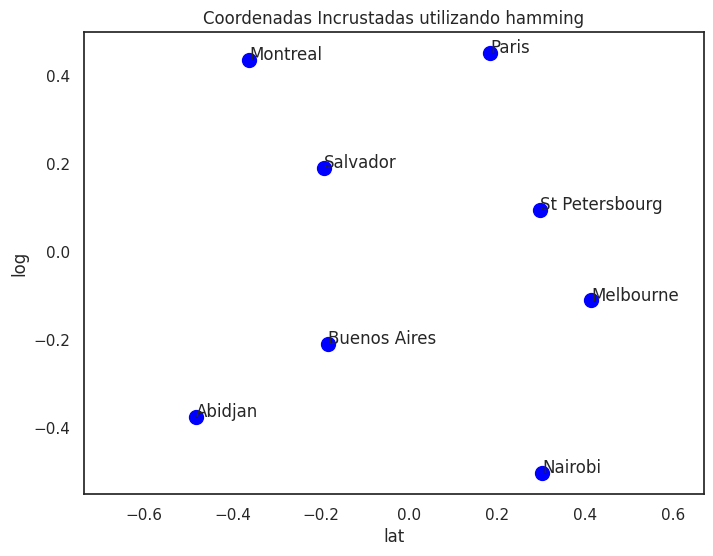

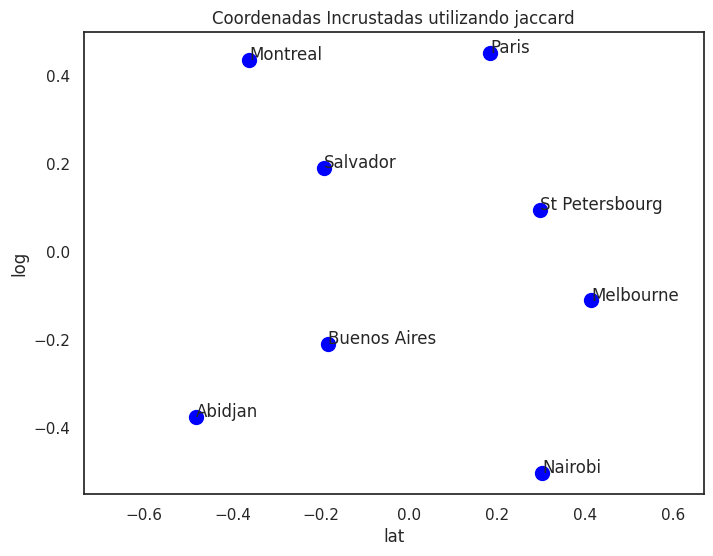

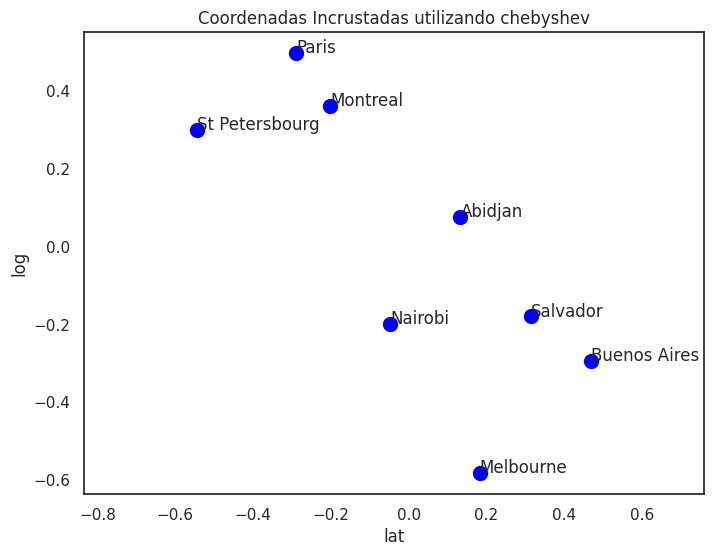

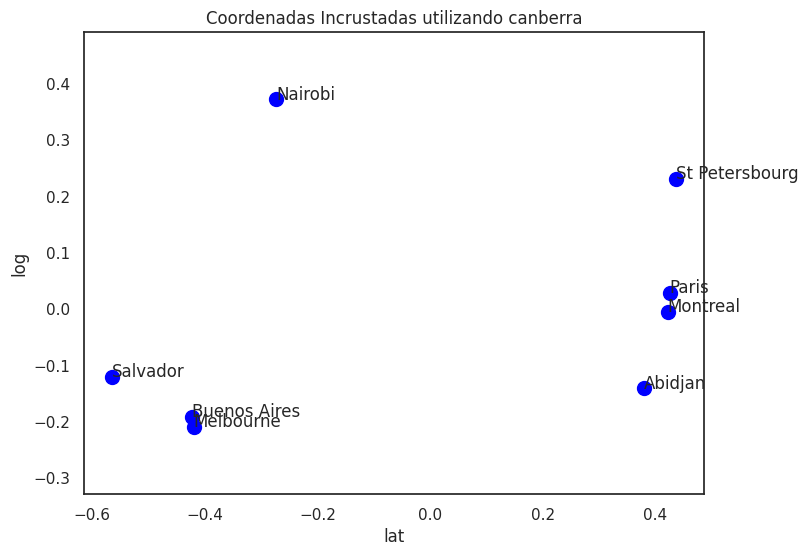

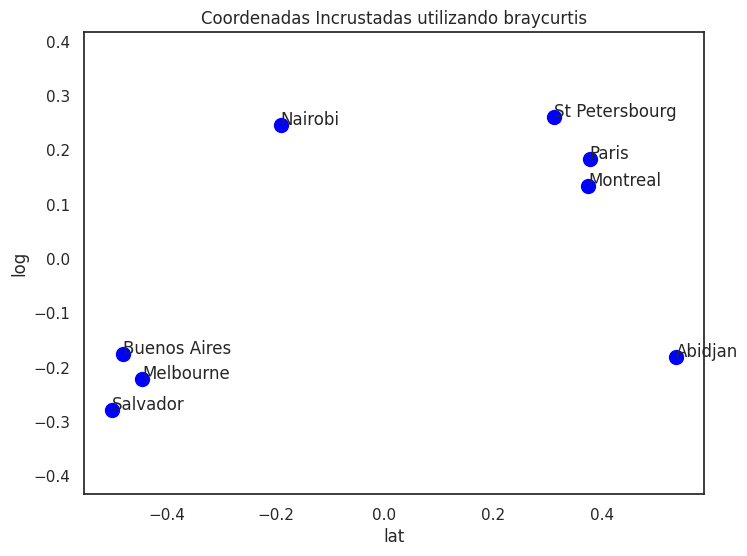

In [24]:
# Lista de distancias a utilizar
dist = ['cosine', 'cityblock', 'seuclidean', 'sqeuclidean', 'cosine', 'hamming', 'jaccard', 'chebyshev', 'canberra', 'braycurtis']

# Generamos el primer gráfico de dispersión (conjunto de datos original)
plot_points(df, title = 'conjunto de datos original')

# Realizamos un espacio entre los plots
print("\n\n\n")

# Variable para indicar que no estamos usando métricas
metric = False

# Iteramos sobre las distancias en la lista para generar los gráficos
for d in dist:

    # La función squareform transforma la matriz de distancias en una forma cuadrada.
    matriz = squareform(pdist(df.iloc[:, 1:], metric = d))

    # Calculamos la matriz de distancias utilizando la métrica 'd'
    distance = pd.DataFrame(matriz, columns = df.index, index = df.index)

    # Generamos las coordenadas incrustadas utilizando MDS con la matriz de distancias precalculadas
    embedding = MDS(dissimilarity = 'precomputed', random_state = 0, n_components = 2, metric = False)

    # Utilizamos el método fit_transform() del objeto embedding para calcular las coordenadas incrustadas utilizando el algoritmo MDS. El resultado se almacena en la variable X_transformed.
    X_transformed = embedding.fit_transform(distance)

    # Creamos un DataFrame llamado df_t para almacenar las coordenadas incrustadas calculadas previamente. Las columnas del DataFrame df_t se establecen utilizando las mismas etiquetas que el DataFrame original df (columnas de coordenadas 'lon' y 'lat'). Además, los índices del DataFrame df_t también se configuran igual que los del DataFrame original df, lo que asegura la correspondencia entre las coordenadas incrustadas y los puntos originales.
    df_t = pd.DataFrame(X_transformed, columns = df.columns, index = df.index)

    # Generamos el gráfico de dispersión para las coordenadas incrustadas con la métrica 'd'
    plot_points(df_t, title = 'Coordenadas Incrustadas utilizando ' + d, color = 'blue')

    # Realizamos un espacio entre los plots
    print("\n\n\n")


$ \ $

-----

## ***Dimensionality Reduction with MDS***

$ \ $

$\color{lightgreen}{\text{Dimensionality Reduction}}$ with Multidimensional Scaling ($\color{yellow}{\text{MDS}}$) is a statistical technique that aims to reduce the number of dimensions in a dataset while preserving the pairwise distances or similarities between data points. The goal is to create a lower-dimensional representation of the data that captures the essential structure and relationships between the data points. I'll explain the process in depth using mathematical details:

Suppose we have a dataset with $n$ data points represented by a matrix $D=(D_{ij})$, where $D_{ij}$ represents the distance or similarity between data points $x_i$ and $x_j$ in the original high-dimensional space. The entries of $D$ could be actual distances or dissimilarities between points, or they could be similarity measures like correlation coefficients, cosine similarities, etc.

$(a)$ $\color{lightblue}{\text{Creating a Dissimilarity Matrix.}}$

If the dataset provides similarity measures, we can convert them into dissimilarities. For example, if we have similarity coefficients $S_{ij}$, we can convert them into dissimilarity measures $D_{ij}$ using $D_{ij} = 1 - S_{ij}$.

$(b)$ $\color{lightblue}{\text{Computing the Distance Matrix.}}$

If we have data points represented as vectors in a high-dimensional space, we can compute the pairwise distances between them to create the dissimilarity matrix $D$. This can be done using various distance metrics such as Euclidean distance, Manhattan distance, etc.

$(c)$ $\color{lightblue}{\text{Choose Dimensionality.}}$

Select the desired number of dimensions $k$ for the low-dimensional representation. Typically, $k$ is chosen such that $k \ll n$, meaning that we aim to reduce the dimensionality significantly.

$(d)$ $\color{lightblue}{\text{Constructing the Low-Dimensional Representation.}}$

The goal of $\color{yellow}{\text{MDS}}$ is to find a lower-dimensional representation of the data points in a $k$-dimensional space while preserving the pairwise distances or similarities between the points as much as possible. Let $Y$ be the low-dimensional representation, where $Y_{ik}$ represents the $k$-th coordinate of the data point $x_i$ in the low-dimensional space.

$(e)$ $\color{lightblue}{\text{Stress Function.}}$

The stress function in $\color{yellow}{\text{MDS}}$ measures the discrepancy between the pairwise distances or similarities in the original high-dimensional space ($D$) and the distances between the data points in the low-dimensional space ($Y$). The stress function is defined as:

$$E = \sqrt{\frac{\sum \limits_{i \neq j} (d_{ij} - \| y_i - y_j \|)^2}{\sum \limits_{i \neq j} d_{ij}^2}}$$

where $d_{ij}$ is the distance or similarity between data points $x_i$ and $x_j$ in the original high-dimensional space, and $\| y_i - y_j \|$ is the Euclidean distance between their low-dimensional representations in $Y$.

$(f)$ $\color{lightblue}{\text{Optimization.}}$

The $\color{yellow}{\text{MDS}}$ algorithm aims to find the configuration of points in the low-dimensional space that minimizes the stress function $E$. This is typically done using optimization techniques like gradient descent. The optimization process adjusts the coordinates of the data points in the low-dimensional space iteratively until the stress function is minimized.

$(g)$ $\color{lightblue}{\text{Visualizing the Low-Dimensional Representation.}}$

Once the optimization converges, the data points are represented in the $k$-dimensional space. This low-dimensional representation can be visualized using scatter plots or other visualization techniques to explore the underlying structure and relationships between the data points.

In summary, $\color{lightgreen}{\text{Dimensionality Reduction}}$ with $\color{yellow}{\text{MDS}}$ aims to create a lower-dimensional representation of the data while preserving the pairwise distances or similarities as much as possible. This allows us to visualize high-dimensional data in a more accessible and interpretable format, helping us to gain insights into the underlying patterns and relationships within the dataset.



$ \ $

------

## ***Example (dimensional reduction)***

$ \ $

$(1)$ Consider the digits dataset that consists of $8 \times 8$ pixel images of digits ranging from $0$ to $9$.

In [25]:
# Cargamos el conjunto de datos 'digits' utilizando la función load_digits de scikit-learn.
# El parámetro n_class = 6 se utiliza para cargar solo 6 clases del conjunto de datos original, en lugar de las 10 clases disponibles.
digits = load_digits(n_class = 6)

# 'X' contiene las características (atributos) de las imágenes de los dígitos escritos a mano.
X = digits.data

# 'y' contiene las etiquetas de clase correspondientes a los dígitos.
y = digits.target

# Calculamos el número de muestras y características en el conjunto de datos 'X'.
# 'n_samples' almacena la cantidad de muestras (número de imágenes de dígitos) y 'n_features' almacena la cantidad de características (número de píxeles en cada imagen).
n_samples, n_features = X.shape

$ \ $

$(2)$ We can see that there are $64$ features or dimensions of $x_i$.


In [26]:
print("Samples: ", n_samples)
print("Features: ", n_features)

Samples:  1083
Features:  64


$ \ $

$(3)$ We can plot out the different $x_{i}$  by converting them to a square array.


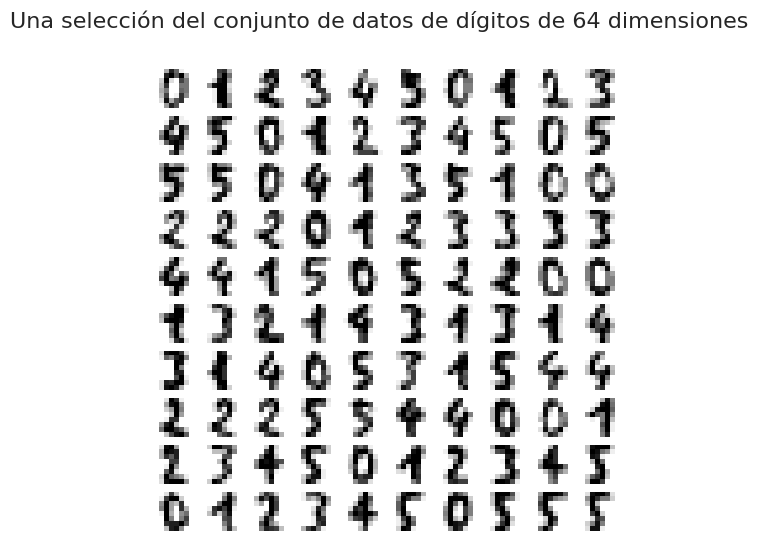

In [27]:
# Creamos una figura que contiene una matriz de 10 filas y 10 columnas de subgráficos (ejes) en una cuadrícula.
# La figura tiene un tamaño de 6x6 pulgadas.
fig, axs = plt.subplots(nrows = 10, ncols = 10, figsize = (6, 6))

# Iteramos sobre cada subgráfico en la matriz de subgráficos utilizando la función `enumerate`.
# La variable `idx` contiene el índice del subgráfico y `ax` es el objeto de eje correspondiente.
for idx, ax in enumerate(axs.ravel()):

    # La imagen se obtiene del conjunto de datos 'X' y se redimensiona a una matriz de 8x8 píxeles.
    imagen = X[idx]
    imagen = imagen.reshape((8, 8))

    # Mostramos una imagen de dígito en el subgráfico actual utilizando el método `imshow`.
    # Utilizamos el mapa de colores 'binary' para mostrar la imagen en blanco y negro.
    ax.imshow(imagen, cmap = plt.cm.binary)

    # Desactivamos los ejes en cada subgráfico para mostrar solo las imágenes.
    ax.axis("off")

# Agregamos un título a la figura que describe el contenido de los subgráficos.
subtitulo = fig.suptitle("Una selección del conjunto de datos de dígitos de 64 dimensiones", fontsize = 16)

$ \ $

$(4)$ We create an embedding object. As we are using the features $X$, we set dissimilarity to `euclidean`, which is the default choice for the `dissimilarity` parameter in **sklearn.manifold.MDS**.


In [28]:
# Creamos un objeto MDS para realizar la reducción de dimensionalidad.
# El parámetro 'n_components' indica que queremos obtener las coordenadas incrustadas en un espacio bidimensional (plano xy). Es decir, reducir las características a solo dos dimensiones.
# Con 'n_components=2', obtendremos dos columnas para cada punto, representando sus coordenadas x e y en el plano.
embedding = MDS(n_components = 2, n_init = 1, max_iter = 120, n_jobs = 2)

$ \ $

$(5)$ We can apply $\color{yellow}{\text{MDS}}$ to the data $X$, we will fit the model and make a prediction simultaneously using the <code>fit_transform</code> method.


In [29]:
# Utilizamos el objeto 'embedding', que es una instancia del algoritmo MDS previamente creado, para realizar la reducción de dimensionalidad en el conjunto de datos 'X'.
# La función 'fit_transform' ajusta el algoritmo MDS a los datos y devuelve las coordenadas incrustadas.
X_transformed = embedding.fit_transform(X)

$ \ $

$(6)$ We plot the samples in the embedding space and overlay images of the digit and the colour representing the digit. We see that although there is some overlap, each cluster corresponds to a different digit, this is despite the fact that the method is unsupervised.

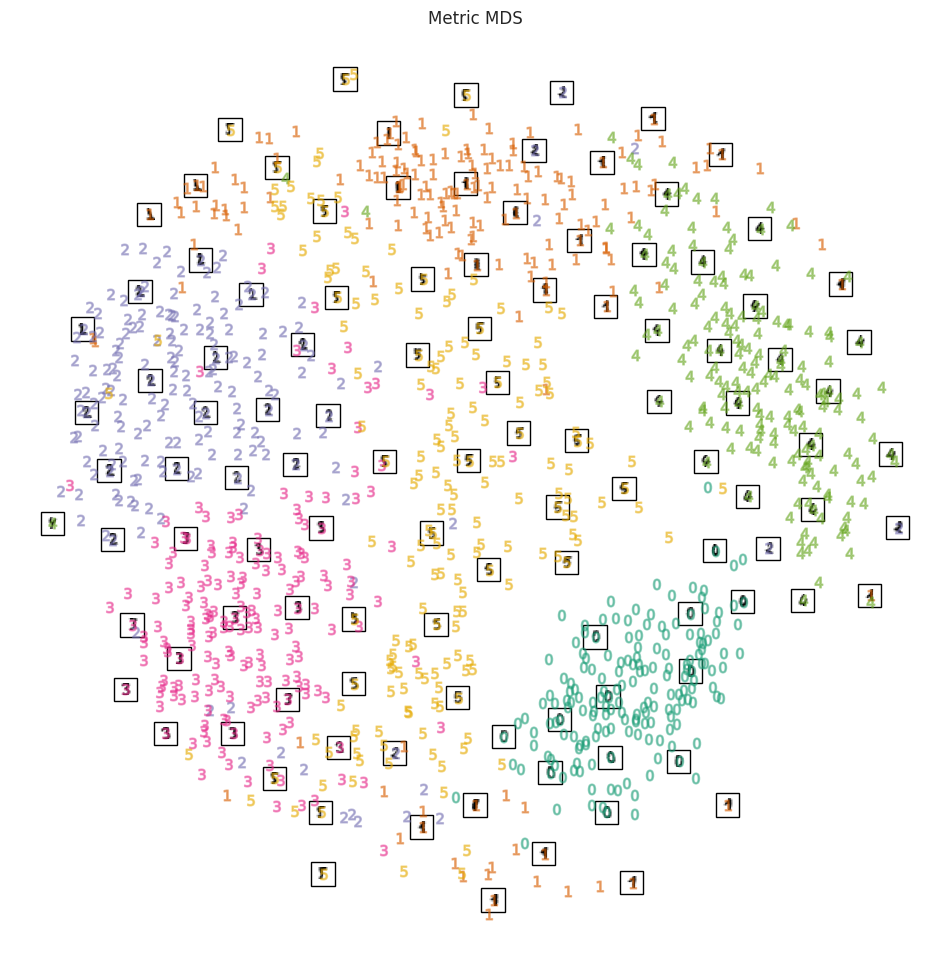

In [30]:
# Creamos una figura con un solo subgráfico (eje).
fig, ax = plt.subplots(figsize = (12, 12))

# Utilizamos la función 'plot_embedding' para graficar las coordenadas incrustadas 'X_transformed' en el subgráfico.
# El título del gráfico se establece como "Metric MDS".
plot_embedding(X_transformed, "Metric MDS", ax)

# Mostramos la figura que contiene la visualización de los datos reducidos.
plt.show()

$ \ $

-----

## ***Example***

$ \ $

We will apply metric $\color{yellow}{\text{MDS}}$ using different distance metrics in the list ***dist*** given by:




In [31]:
dist= ['cosine','cityblock','hamming','jaccard','chebyshev','canberra','braycurtis']


to the digit dataset $X_{norm}$ that has been normalized.


In [32]:
# Creamos un objeto MinMaxScaler para realizar la normalización de las características.
scaler = MinMaxScaler()

# Utilizamos el objeto scaler para realizar la normalización de las características del conjunto de datos 'X'.
# La función 'fit_transform' ajusta el escalador a los datos y transforma las características a un rango específico (generalmente entre 0 y 1).
X_norm = scaler.fit_transform(X)

cosine


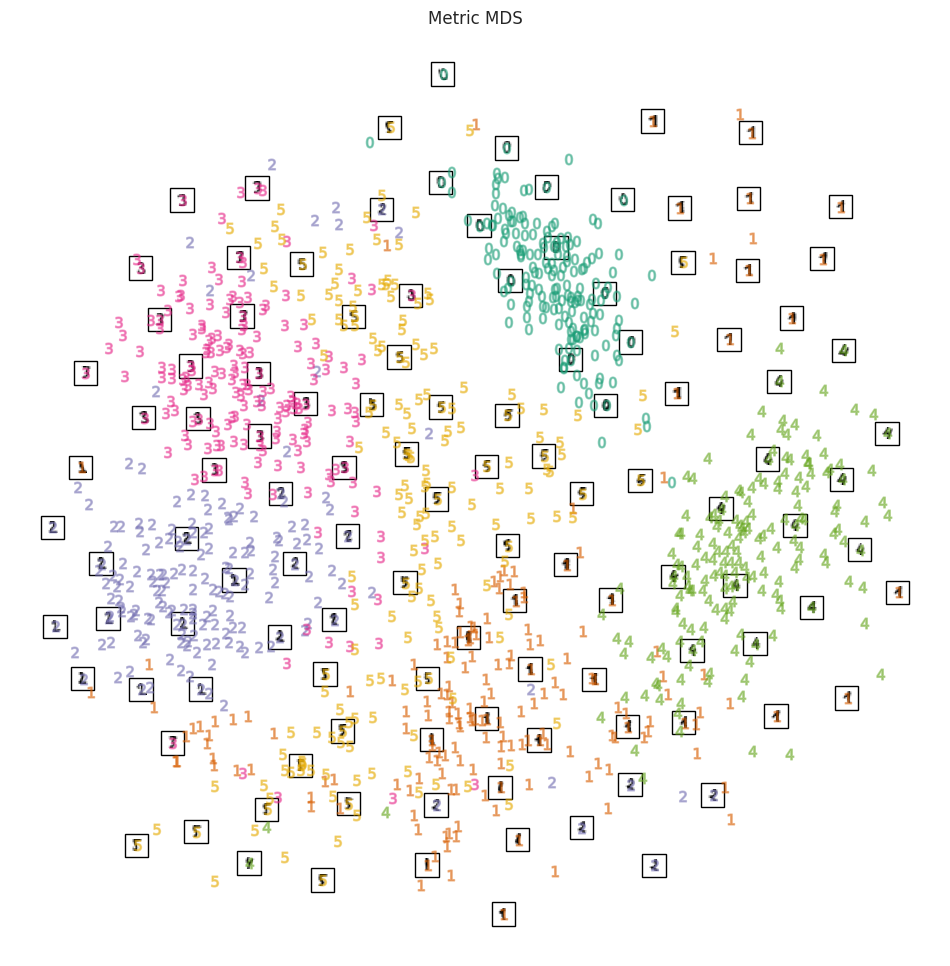





cityblock


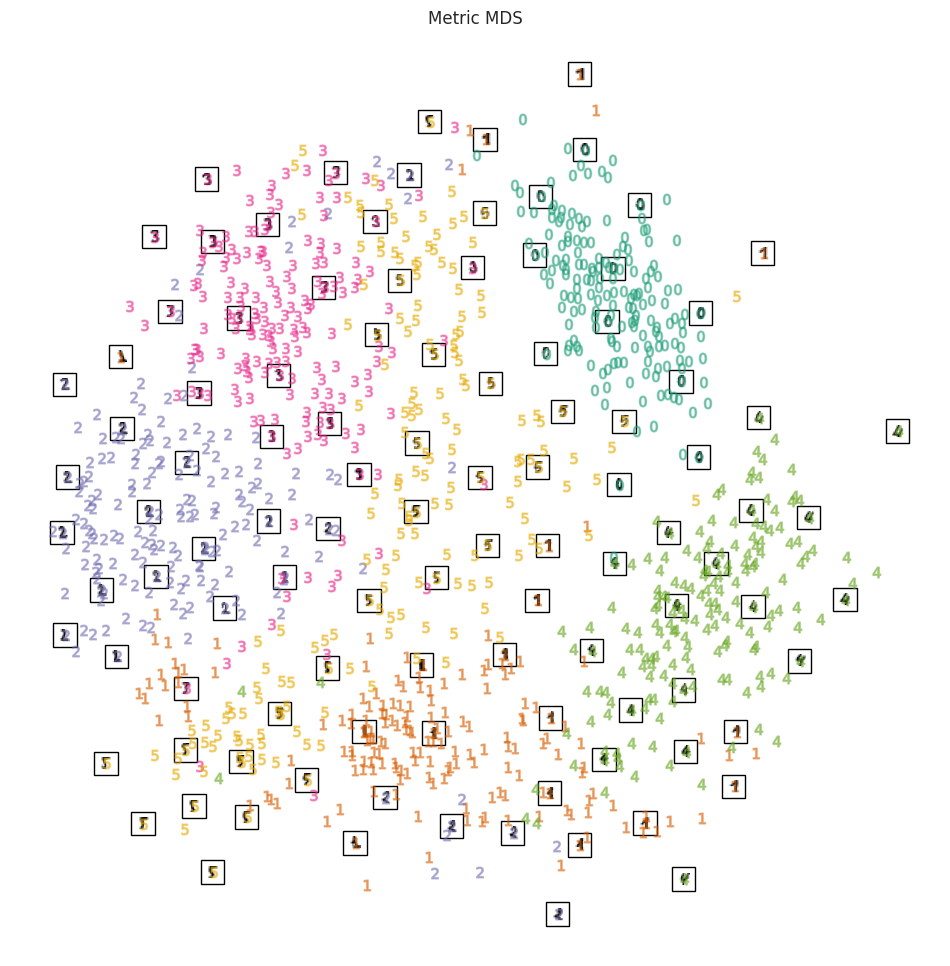





hamming


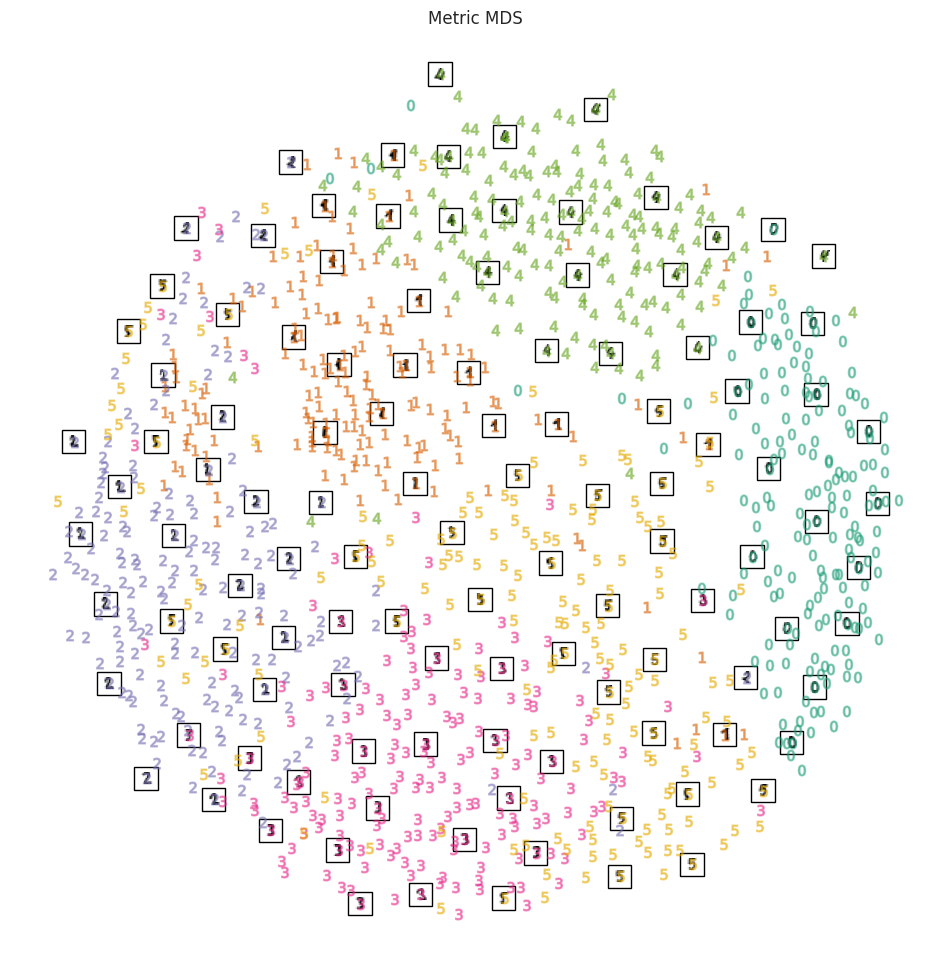





jaccard


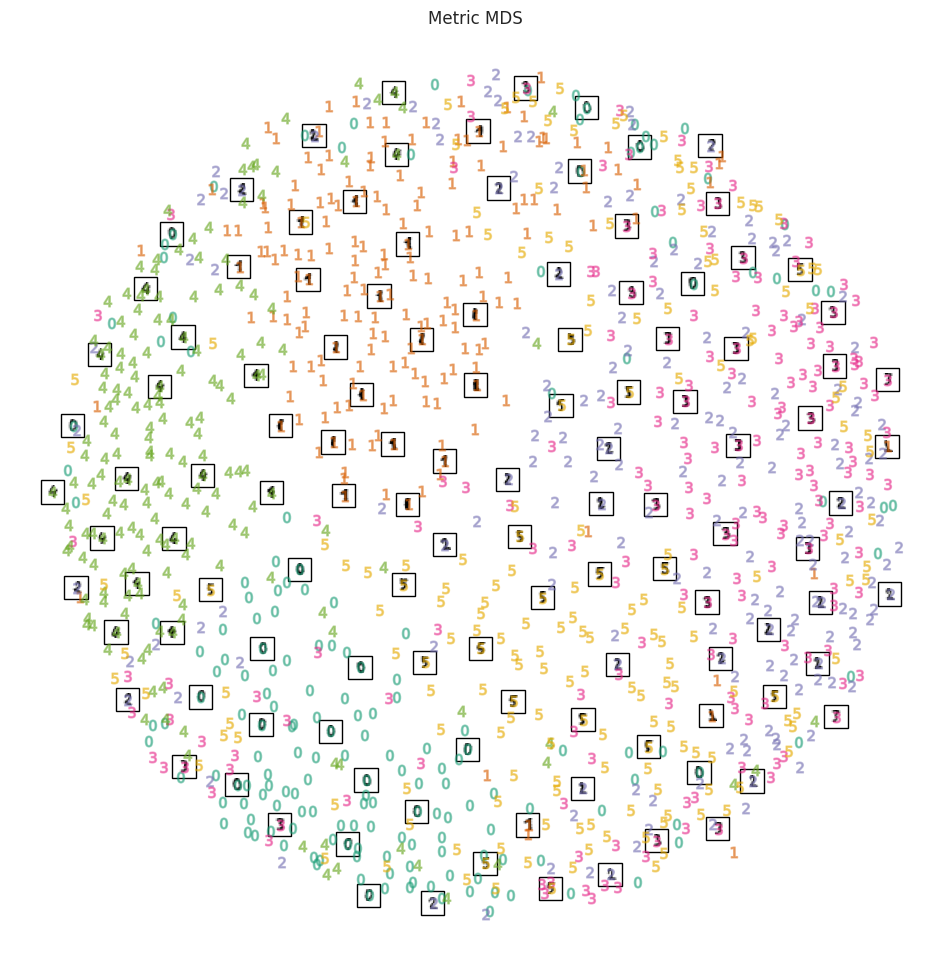





chebyshev


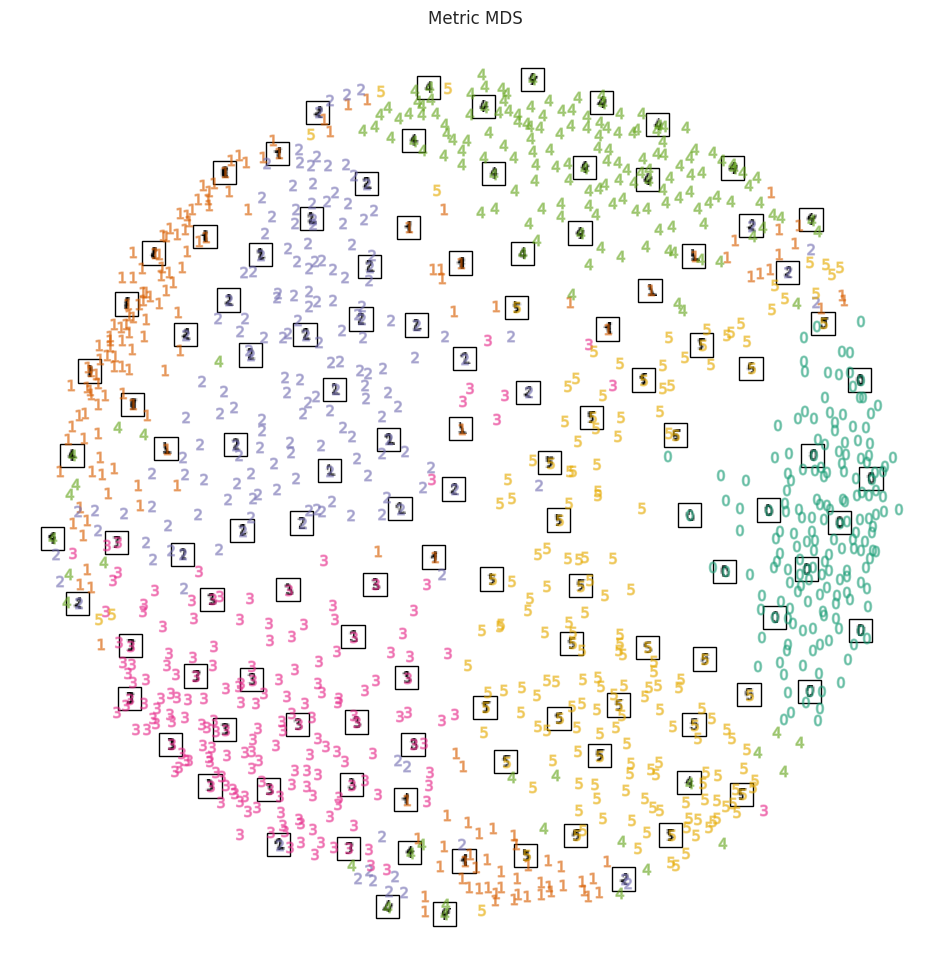





canberra


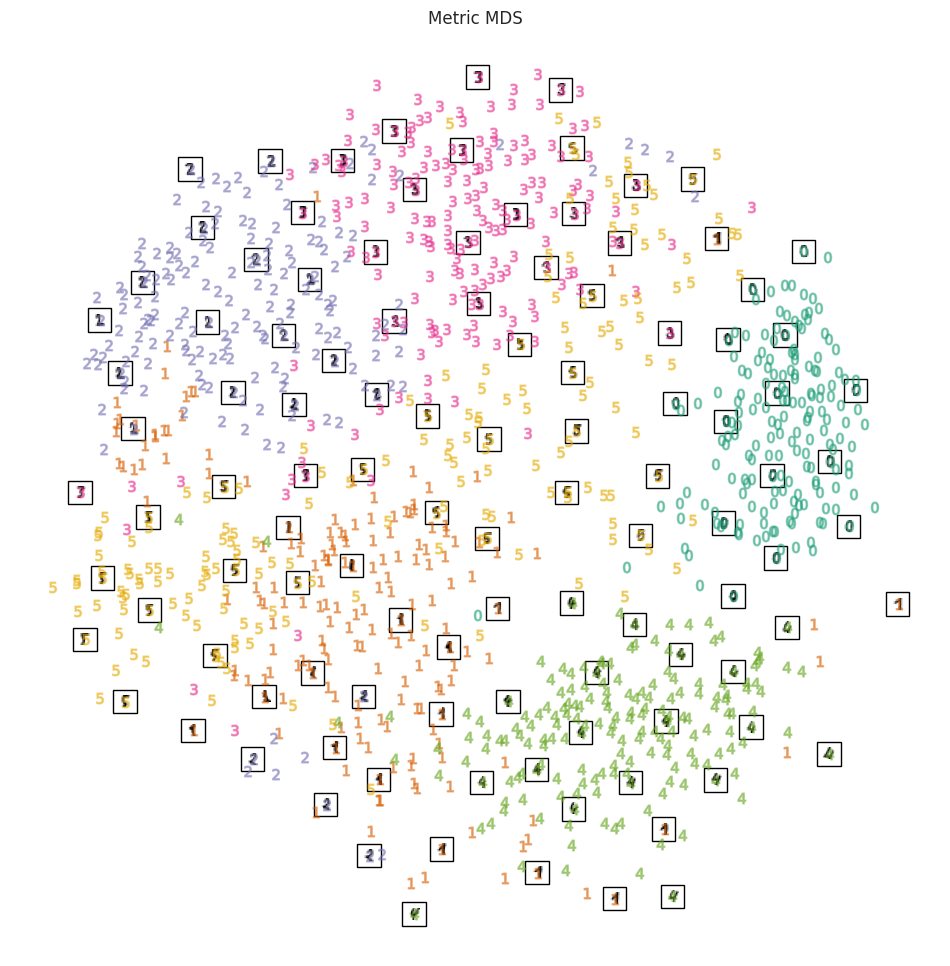





braycurtis


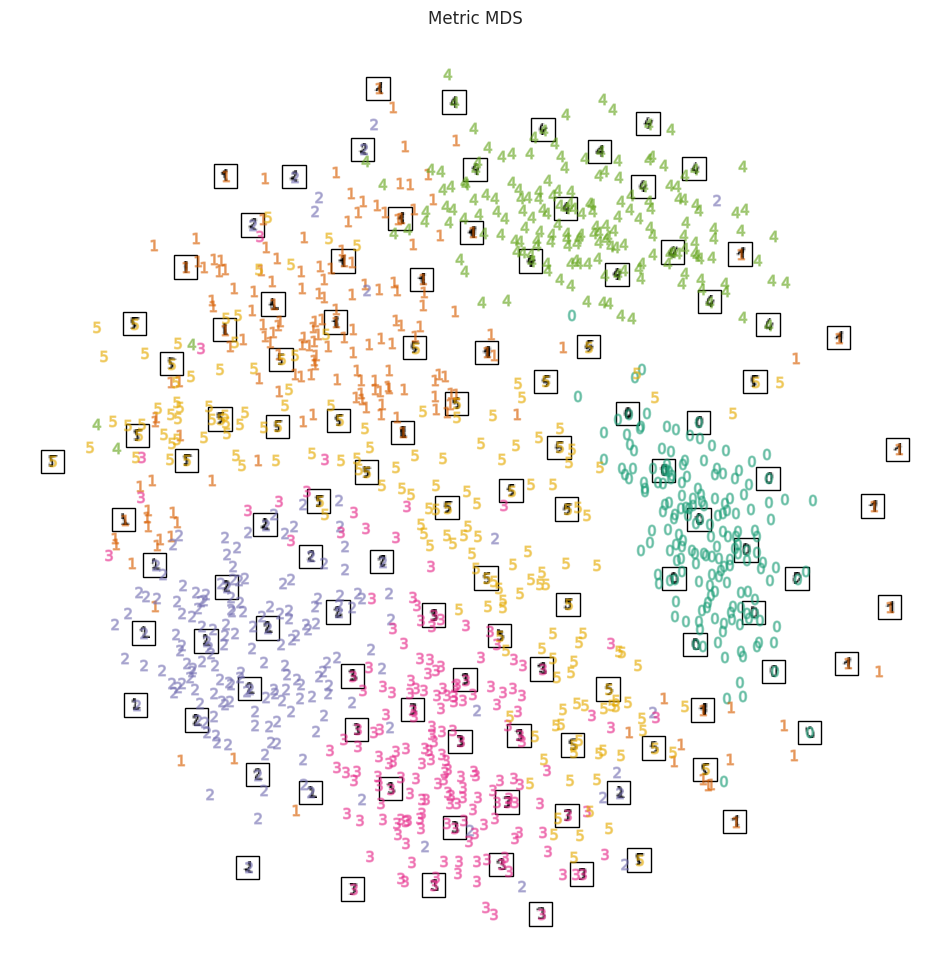

In [33]:
# Iteramos sobre cada métrica de distancia en la lista 'dist'.
for d in dist:

    # Calculamos la matriz de distancias entre las características normalizadas utilizando la métrica de distancia actual.
    distance = squareform(pdist(X_norm, metric = d))

    # Imprimimos el nombre de la métrica de distancia actual.
    print(d)

    # Creamos un objeto MDS para realizar la reducción de dimensionalidad con la matriz de distancias calculada.
    # Se establece 'n_components=2' para obtener dos dimensiones en el espacio reducido.
    embedding = MDS(dissimilarity = 'precomputed', random_state = 0, n_components = 2)

    # Aplicamos el algoritmo MDS a la matriz de distancias para obtener las coordenadas incrustadas en un espacio bidimensional.
    X_transformed = embedding.fit_transform(distance)

    # Creamos una figura con un solo subgráfico (eje) para mostrar la visualización de los datos reducidos.
    fig, ax = plt.subplots(figsize = (12, 12))

    # Utilizamos la función 'plot_embedding' para graficar las coordenadas incrustadas 'X_transformed' en el subgráfico.
    # El título del gráfico se establece como "Metric MDS".
    plot_embedding(X_transformed, "Metric MDS", ax)

    # Mostramos la figura que contiene la visualización de los datos reducidos en el espacio bidimensional obtenido mediante el algoritmo MDS.
    plt.show()

    # Marcamos un espacio entre cada plot
    print("\n\n\n")

$ \ $

-----

## ***T-Distributed Stochastic Neighbor Embedding***

$ \ $

$\color{lightgreen}{\text{T-Distributed Stochastic Neighbor Embeddingdenoted by T-SNE}}$  is a nonlinear dimensionality reduction technique used to visualize high-dimensional data in a low-dimensional space. The method aims to preserve the pairwise similarities between data points in the original high-dimensional space while mapping them into a lower-dimensional space. Let's delve into the mathematical details:

Suppose we have a dataset with $n$ data points represented by a high-dimensional matrix $X$, where $X_{ij}$ represents the value of the $j$-th feature of the $i$-th data point. t-SNE seeks to find a low-dimensional representation $Y$ in a $k$-dimensional space ($Y \in \mathbb{R}^{n \times k}$) such that pairwise similarities between data points are preserved.

$(a)$ $\color{lightblue}{\text{Compute Pairwise Similarities.}}$

First, $\color{lightgreen}{\text{T-SNE}}$ computes pairwise similarities between data points in the high-dimensional space. The similarities are typically based on a Gaussian kernel:

$$ p_{ij} = \frac{\exp(-\|x_i - x_j\|^2 / (2\sigma_i^2))}{\sum \limits_{k \neq i} \exp(-\|x_i - x_k\|^2 / (2\sigma_i^2))} $$

Here, $p_{ij}$ represents the similarity between data points $x_i$ and $x_j$, and $\sigma_i$ is the variance of the Gaussian kernel for data point $x_i$. The value of $\sigma_i$ is determined by the perplexity parameter, which controls the number of neighbors considered for each data point during the embedding process.

$(b)$ $\color{lightblue}{\text{Compute Similarities in the Low-Dimensional Space.}}$

Next, $\color{lightgreen}{\text{T-SNE}}$ defines pairwise similarities between data points in the low-dimensional space. These similarities are based on a Student's t-distribution with one degree of freedom:

$$ q_{ij} = \frac{(1 + \|y_i - y_j\|^2)^{-1}}{\sum \limits_{k \neq l} (1 + \|y_k - y_l\|^2)^{-1}} $$

Here, $q_{ij}$ represents the similarity between data points $y_i$ and $y_j$ in the low-dimensional space.

$(c)$ $\color{lightblue}{\text{Optimization Objective.}}$

The objective of $\color{lightgreen}{\text{T-SNE}}$ is to minimize the Kullback-Leibler divergence (KL divergence) between the distributions $P$ and $Q$:

$$C = KL(P \| Q) = \sum_i \sum_j p_{ij} \log\left(\frac{p_{ij}}{q_{ij}}\right) $$

The KL divergence measures the difference between the pairwise similarities in the high-dimensional space ($P$) and the pairwise similarities in the low-dimensional space ($Q$).

$(d)$ $\color{lightblue}{\text{Gradient Descent.}}$

To optimize the objective function, $\color{lightgreen}{\text{T-SNE}}$ uses gradient descent to update the positions of the data points $Y$ in the low-dimensional space. The algorithm aims to find the positions of $Y$ that minimize the KL divergence. The gradients with respect to the positions of the data points can be computed as follows:

$$ \frac{\partial C}{\partial y_i} = 4 \sum_j (p_{ij} - q_{ij})(y_i - y_j)(1 + \|y_i - y_j\|^2)^{-1} $$

$(e)$ $\color{lightblue}{\text{Iterative Update.}}$

The algorithm iteratively updates the positions of the data points in the low-dimensional space using the gradients obtained from the KL divergence. The learning rate and number of iterations are hyperparameters that control the convergence of the optimization process.

$(f)$ $\color{lightblue}{\text{Visualization.}}$

Once the optimization converges, the low-dimensional representation $Y$ is obtained. This low-dimensional representation can be visualized using scatter plots or other visualization techniques to explore the underlying structure and relationships between the data points. The visualizations obtained through $\color{lightgreen}{\text{T-SNE}}$ often reveal clusters and patterns that are not evident in the original high-dimensional space.

In summary, $\color{lightgreen}{\text{T-SNE}}$ is a powerful technique for nonlinear dimensionality reduction that focuses on preserving pairwise similarities between data points. It is commonly used for visualizing high-dimensional data in a lower-dimensional space, revealing underlying patterns and structures in the data.

$ \ $

$(1)$ We apply the algorithm to the same dataset $X$.

In [34]:
# Utilizamos el algoritmo t-SNE para realizar la reducción de dimensionalidad del conjunto de datos 'X'.
# 'n_components = 2' especifica que queremos obtener las coordenadas incrustadas en un espacio bidimensional.
# 'init = random' indica que se utilizará una inicialización aleatoria para el mapeo de los datos.
X_embedded = TSNE(n_components = 2, init = 'random').fit_transform(X)

$ \ $

$(2)$ We see the setup is very similar.

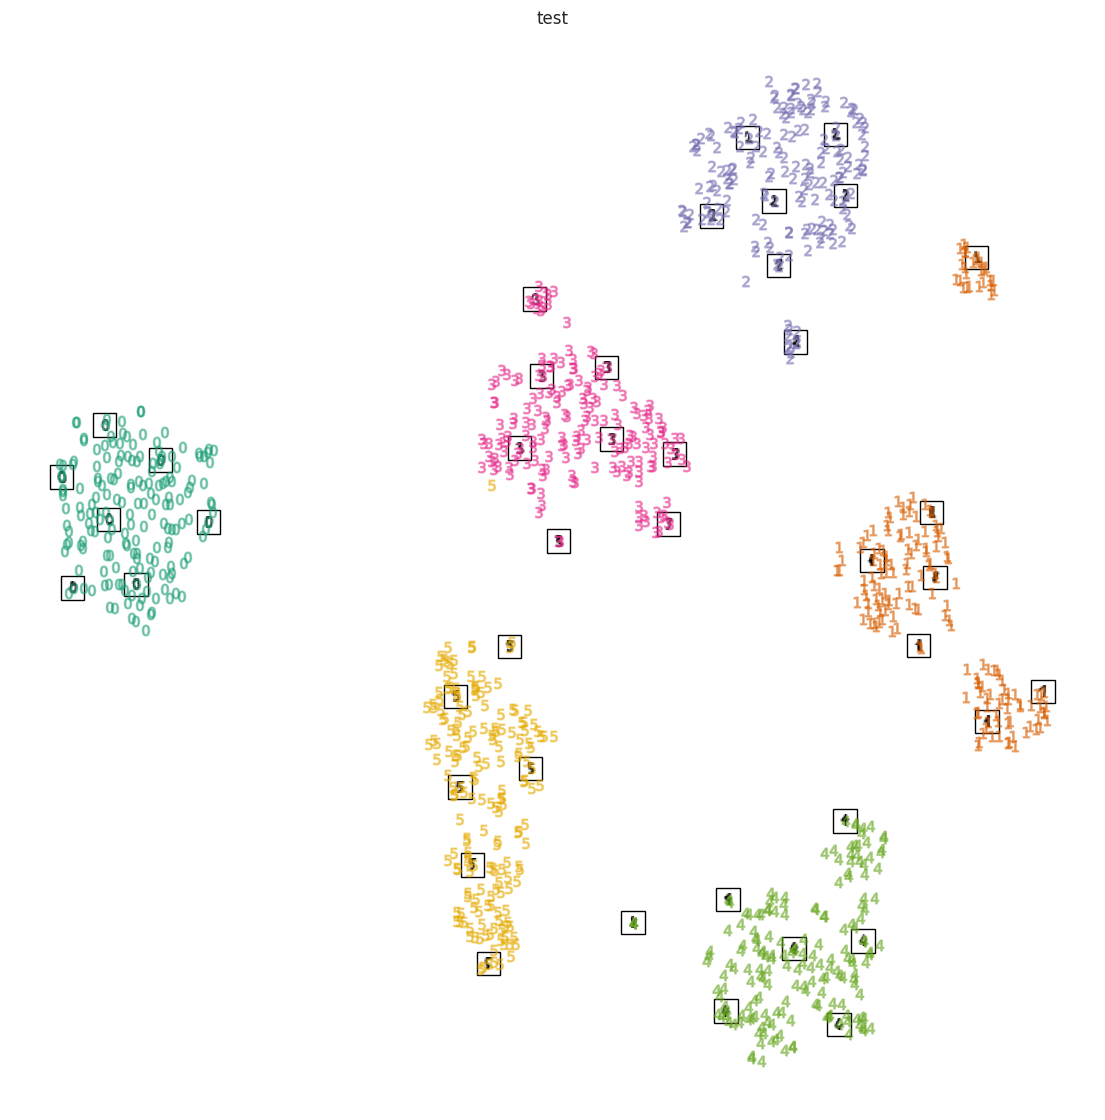

In [35]:
# Creamos una figura con un solo subgráfico (eje).
fig, ax = plt.subplots(figsize = (14, 14))

# Utilizamos la función 'plot_embedding' para graficar las coordenadas incrustadas 'X_embedded' en el subgráfico.
# El título del gráfico se establece como "test".
plot_embedding(X_embedded, "test", ax)

# Mostramos la figura que contiene la visualización de los datos reducidos.
plt.show()